# 6-2 Enhancer-annotation-R
Jakke Neiro

# 1. Introduction

# 2. Distance to the TSS

## 2.1 Histograms

In [31]:
enhancer_annotation_FACS = read.csv("/hydra/enhancer_regions/enhancer_annotation_july21.csv")

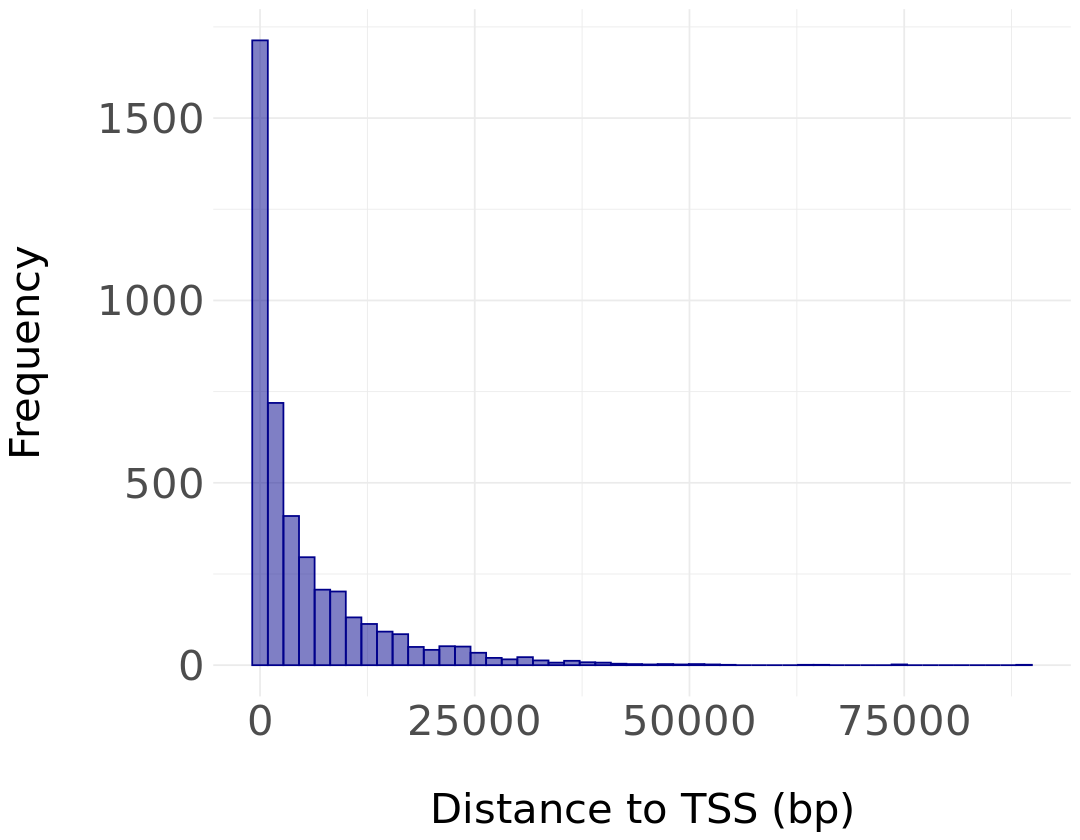

In [32]:
library(ggplot2)
options(repr.plot.width = 9.0, repr.plot.height = 7.0)
p = ggplot(enhancer_annotation_FACS, aes(x=abs(distanceToTSS)))+geom_histogram(col="darkblue", fill="darkblue", alpha = 0.5, bins=50)+theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.position="none", legend.title=element_text(), legend.text=element_text(size=25))
p = p + xlab("\nDistance to TSS (bp)")+ylab("Frequency\n")
p

Warning message:
“Removed 779 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


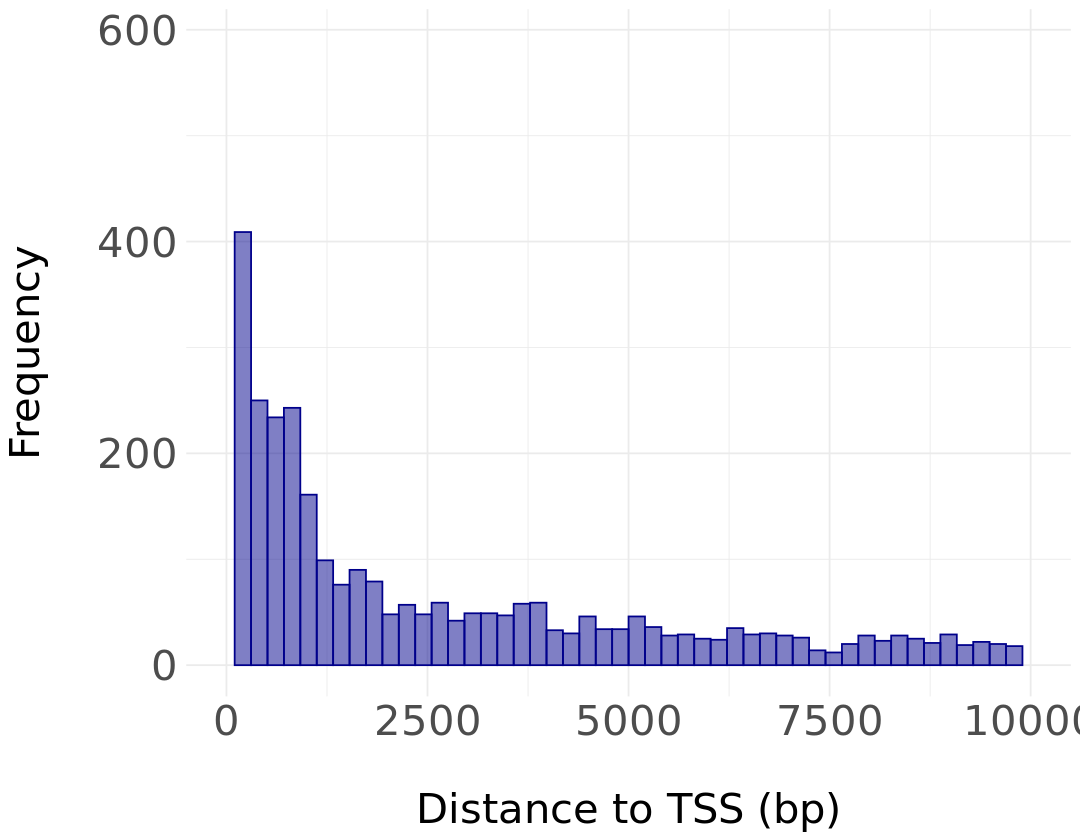

In [34]:
library(ggplot2)
options(repr.plot.width = 9.0, repr.plot.height = 7.0)
p = ggplot(enhancer_annotation_FACS, aes(x=abs(distanceToTSS)))+geom_histogram(col="darkblue", fill="darkblue", alpha = 0.5, bins=50)+theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.position="none", legend.title=element_text(), legend.text=element_text(size=25))
p = p + xlab("\nDistance to TSS (bp)")+ylab("Frequency\n") + xlim(0,10000)
p

## 2.2 Dot distance plots

In [40]:
enhancer_annotation_FACS = read.csv("/hydra/enhancer_regions/enhancer_annotation_july21.csv")

In [109]:
enhancer_annotation_FACS$distcolor = "Intergenic" 
enhancer_annotation_FACS$distrank = 0 
for (i in 1:nrow(enhancer_annotation_FACS)){
    enhancer_annotation_FACS$distrank[i] = i
    if (grepl("Intron", enhancer_annotation_FACS$annotation[i], )){
        enhancer_annotation_FACS$distcolor[i] = "Intronic" 
    }
    if (grepl("Promoter", enhancer_annotation_FACS$annotation[i], )){
        enhancer_annotation_FACS$distcolor[i] = "Promoter" 
    }
}
    

In [110]:
enhancer_annotation_FACS = enhancer_annotation_FACS[order(enhancer_annotation_FACS$distanceToTSS),]

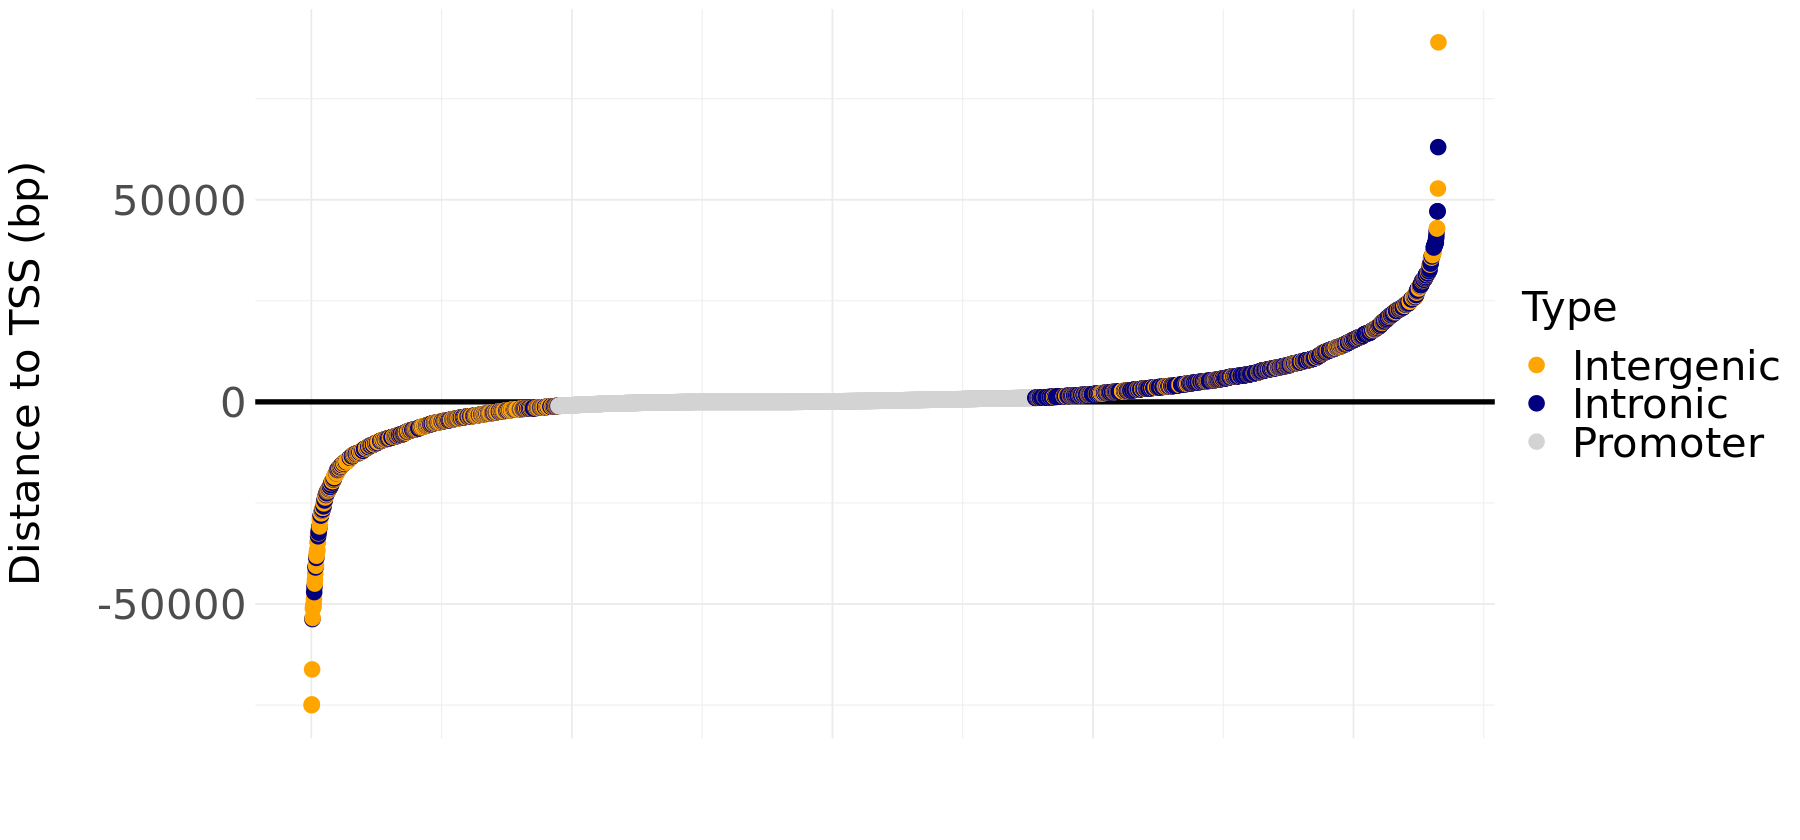

In [133]:
library(ggplot2)
options(repr.plot.width = 15.0, repr.plot.height = 7.0)
p = ggplot(enhancer_annotation_FACS, aes(y=distanceToTSS, x=distrank, color=distcolor))+geom_hline(yintercept=0, col="black", size=1.5)+geom_point(alpha = 1, size=4)+theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_blank(), axis.title=element_text(size=25), legend.text=element_text(size=25))
p = p + xlab("\n")+ylab("Distance to TSS (bp)\n")
p = p + scale_color_manual(name=c("Type"), values=c("orange", "navyblue", "lightgrey"))
p

In [137]:
subset(enhancer_annotation_FACS, enhancer_annotation_FACS$annotation == "Promoter")[1,]

seqnames       start  end    width strand V4                            
666 dd_Smes_g4_131 722466 722746 281   *      k27ac_pooled_april21_peak_5572
    V5      annotation geneChr geneStart geneEnd geneLength geneStrand
666 3.40626 Promoter   37      723744    725096  1353       1         
    geneId     transcriptId     distanceToTSS distcolor distrank
666 MSTRG.3741 SMEST009969001.1 -998          Promoter  949

Warning message:
“Removed 3380 rows containing missing values (geom_point).”


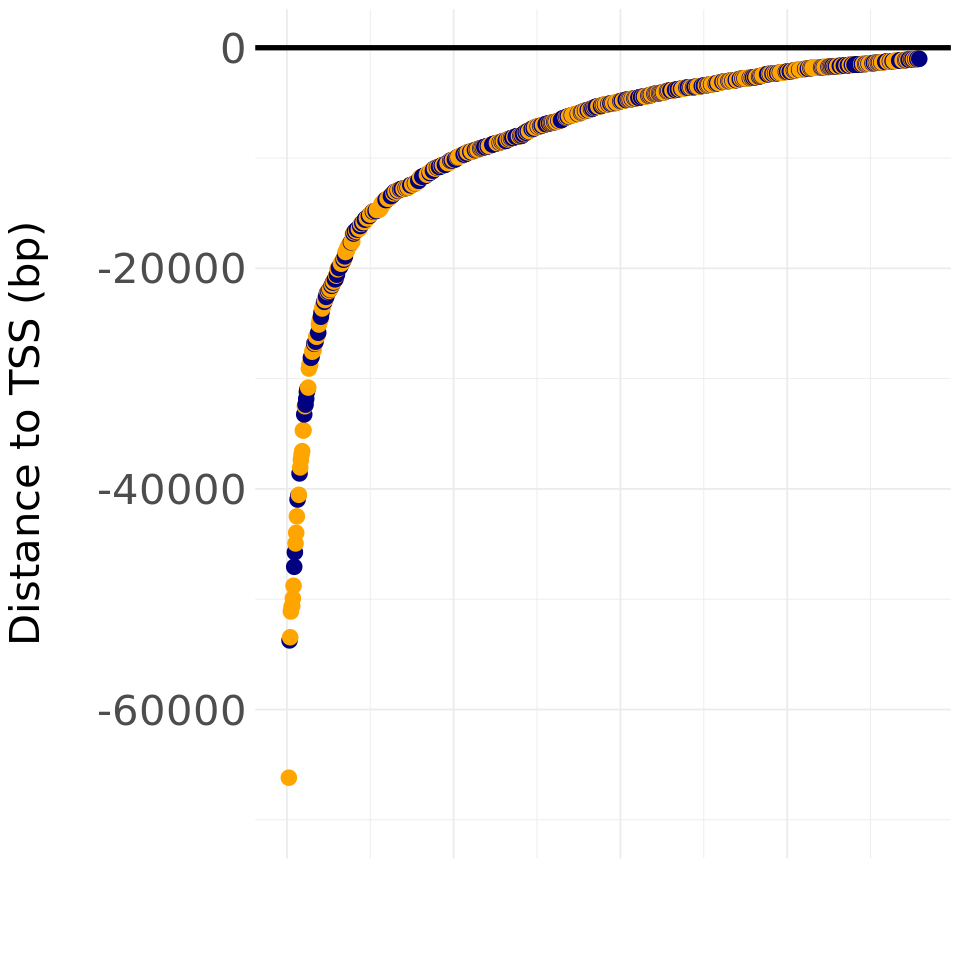

In [154]:
library(ggplot2)
options(repr.plot.width = 8.0, repr.plot.height = 8.0)
p = ggplot(enhancer_annotation_FACS, aes(y=distanceToTSS, x=distrank, color=distcolor))+geom_hline(yintercept=0, col="black", size=1.5)+geom_point(alpha = 1, size=4)+theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_blank(), axis.title=element_text(size=25), legend.position="none")
p = p + xlab("\n")+ylab("Distance to TSS (bp)\n")+ylim(-70000,0)+xlim(0,948)
p = p + scale_color_manual(name=c("Type"), values=c("orange", "navyblue", "lightgrey"))
p

In [157]:
nrow(subset(enhancer_annotation_FACS, enhancer_annotation_FACS$annotation == "Promoter"))
1830+948

[1] 1830

[1] 2778

In [151]:
sum(enhancer_annotation_FACS[1:948,]$distcolor == "Intergenic")
sum(enhancer_annotation_FACS[1:948,]$distcolor == "Intronic")

[1] 565

[1] 383

In [183]:
383/(383+565)

[1] 0.4040084

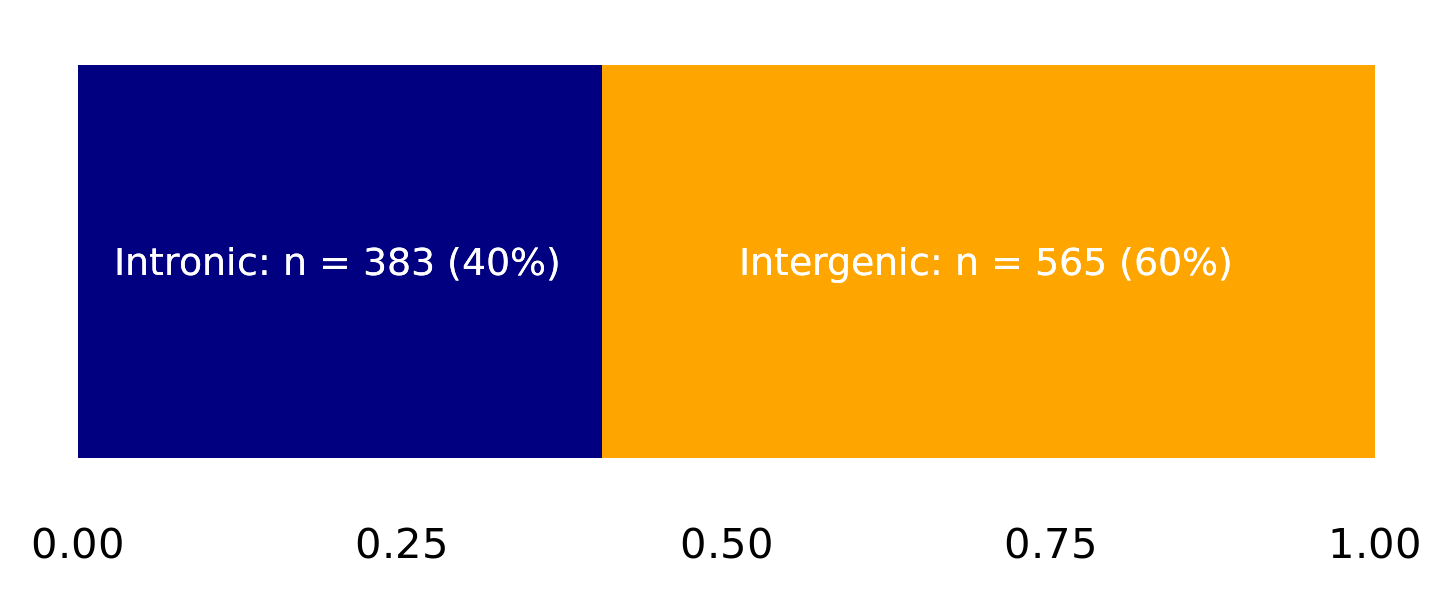

In [200]:
library(ggplot2)
options(repr.plot.width = 12.0, repr.plot.height = 5)
df = data.frame(class=factor(c("Intergenic", "Intronic"), levels=c("Intergenic", "Intronic")), value=c(565,383), id=c(1,1))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_blank(), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.position = "none")
p = p + scale_fill_manual(name=" ", values=c("orange", "navyblue"))
p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
p = p + geom_text(aes(label=c("Intronic: n = 383 (40%)"), y=c(0.20), x=1), size = 8, col="white")
p = p + geom_text(aes(label=c("Intergenic: n = 565 (60%)"), y=c(0.70), x=1), size = 8, col="white")
#p = p + geom_text(aes(label=c("Neoblast TF: n = 43 (0.1%)\nTF: n = 508 (1.9%)\nNon-TF: n =27488 (98%)"), y=c(0.35), x=2), size = 7, col="white")
p

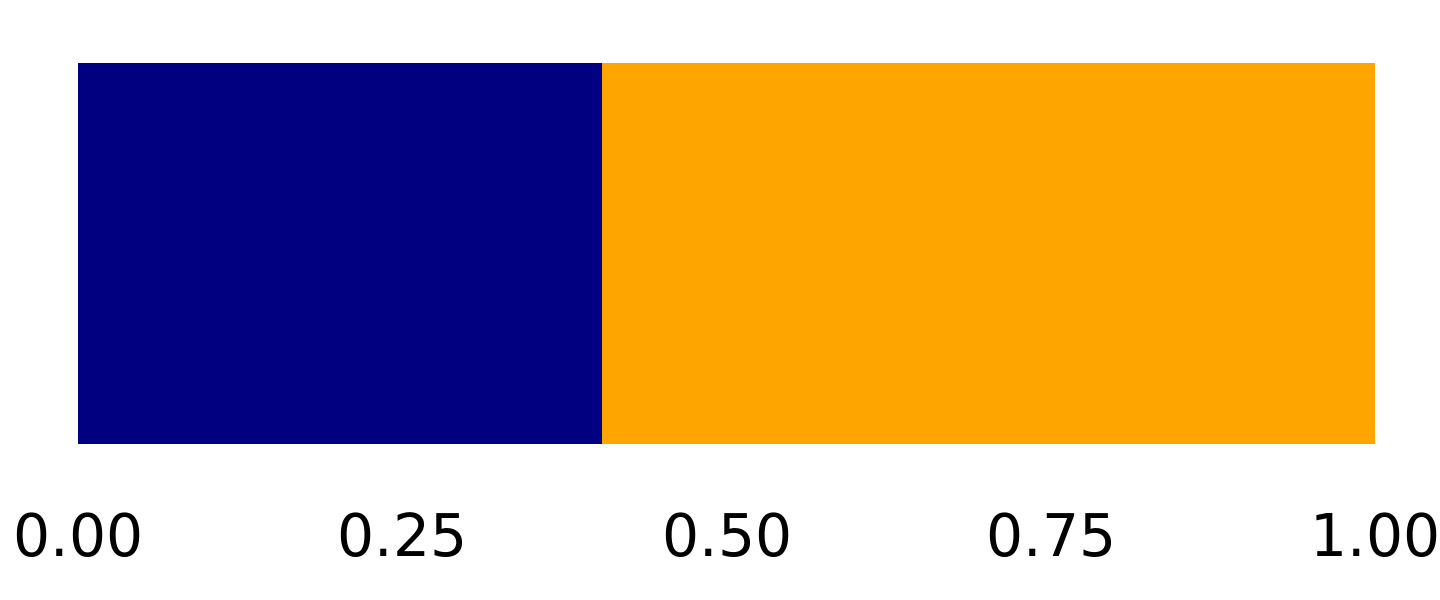

In [213]:
library(ggplot2)
options(repr.plot.width = 12.0, repr.plot.height = 5)
df = data.frame(class=factor(c("Intergenic", "Intronic"), levels=c("Intergenic", "Intronic")), value=c(565,383), id=c(1,1))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_blank(), axis.text.x=element_text(size=35), axis.title=element_text(size=25), legend.position = "none")
p = p + scale_fill_manual(name=" ", values=c("orange", "navyblue"))
p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
#p = p + geom_text(aes(label=c("Intronic: n = 383 (40%)"), y=c(0.20), x=1), size = 8, col="white")
#p = p + geom_text(aes(label=c("Intergenic: n = 565 (60%)"), y=c(0.70), x=1), size = 8, col="white")
#p = p + geom_text(aes(label=c("Neoblast TF: n = 43 (0.1%)\nTF: n = 508 (1.9%)\nNon-TF: n =27488 (98%)"), y=c(0.35), x=2), size = 7, col="white")
p

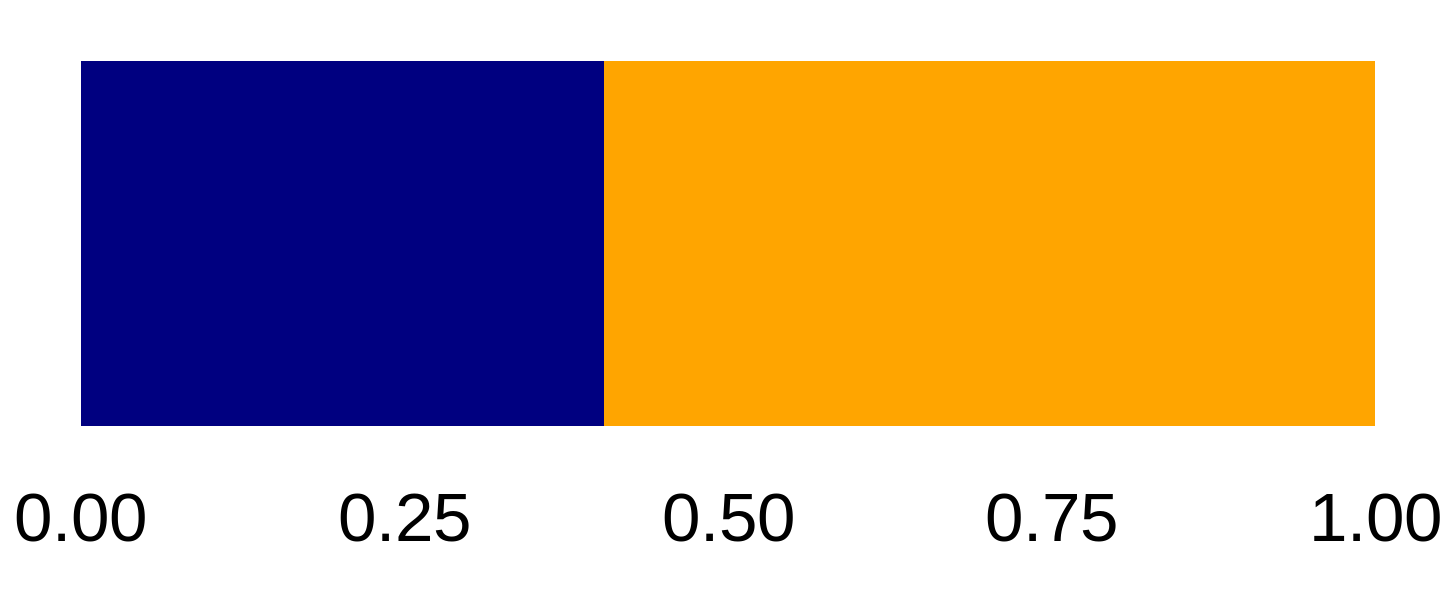

In [6]:
library(ggplot2)
options(repr.plot.width = 12.0, repr.plot.height = 5)
df = data.frame(class=factor(c("Intergenic", "Intronic"), levels=c("Intergenic", "Intronic")), value=c(565,383), id=c(1,1))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_blank(), axis.text.x=element_text(size=41.5), axis.title=element_text(size=35), legend.position = "none")
p = p + scale_fill_manual(name=" ", values=c("orange", "navyblue"))
p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
#p = p + geom_text(aes(label=c("Intronic: n = 383 (40%)"), y=c(0.20), x=1), size = 8, col="white")
#p = p + geom_text(aes(label=c("Intergenic: n = 565 (60%)"), y=c(0.70), x=1), size = 8, col="white")
#p = p + geom_text(aes(label=c("Neoblast TF: n = 43 (0.1%)\nTF: n = 508 (1.9%)\nNon-TF: n =27488 (98%)"), y=c(0.35), x=2), size = 7, col="white")
p

Warning message:
“Removed 2777 rows containing missing values (geom_point).”


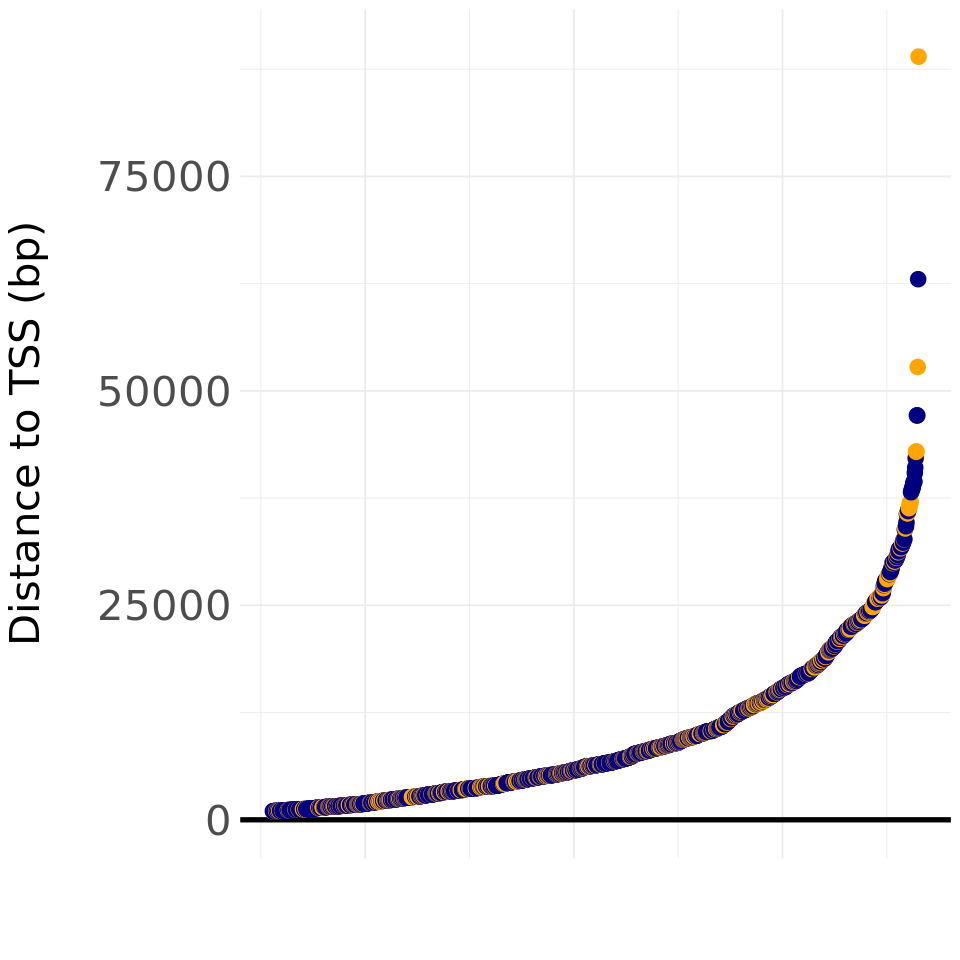

In [195]:
library(ggplot2)
options(repr.plot.width = 8.0, repr.plot.height = 8.0)
p = ggplot(enhancer_annotation_FACS, aes(y=distanceToTSS, x=distrank, color=distcolor))+geom_hline(yintercept=0, col="black", size=1.5)+geom_point(alpha = 1, size=4)+theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_blank(), axis.title=element_text(size=25), legend.position="none")
p = p + xlab("\n")+ylab("Distance to TSS (bp)\n")+ylim(0,90000)+xlim(2778, nrow(enhancer_annotation_FACS))
p = p + scale_color_manual(name=c("Type"), values=c("orange", "navyblue", "lightgrey"))
p

In [199]:
sum(enhancer_annotation_FACS[948:nrow(enhancer_annotation_FACS),]$distcolor == "Intergenic")
sum(enhancer_annotation_FACS[948:nrow(enhancer_annotation_FACS),]$distcolor == "Intronic")

[1] 469

[1] 1080

In [205]:
469/(469+1080)

[1] 0.302776

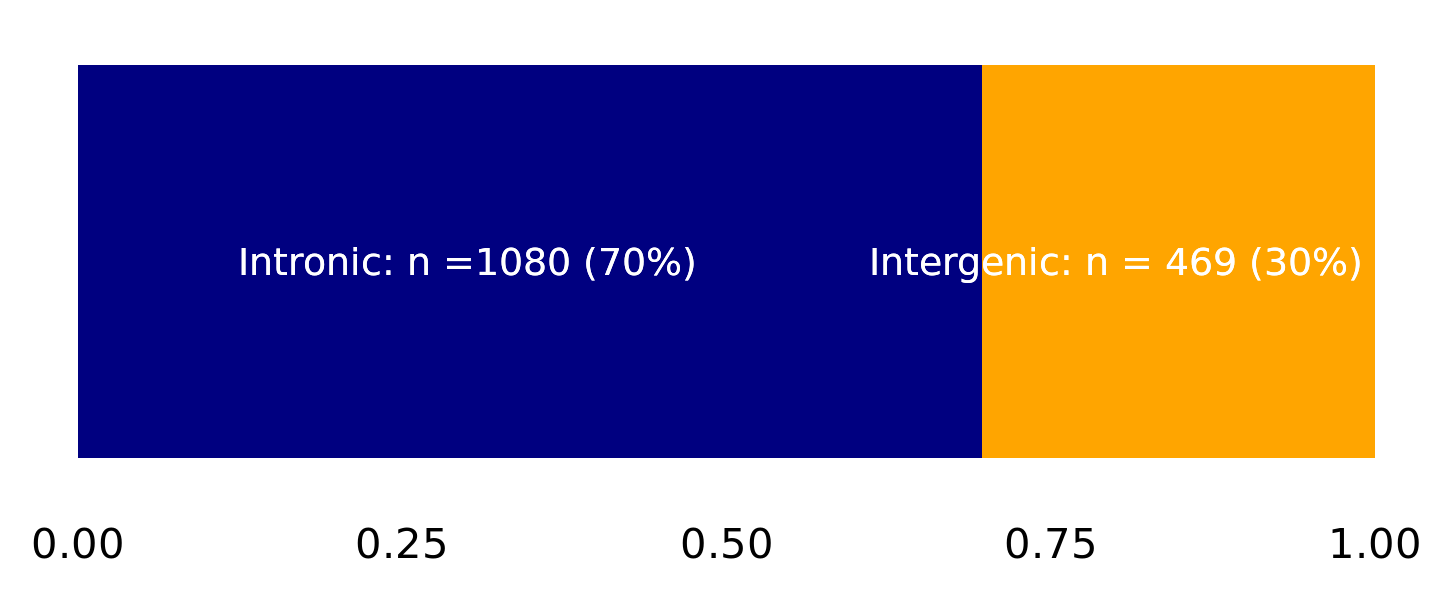

In [207]:
library(ggplot2)
options(repr.plot.width = 12.0, repr.plot.height = 5)
df = data.frame(class=factor(c("Intergenic", "Intronic"), levels=c("Intergenic", "Intronic")), value=c(469,1080), id=c(1,1))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_blank(), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.position = "none")
p = p + scale_fill_manual(name=" ", values=c("orange", "navyblue"))
p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
p = p + geom_text(aes(label=c("Intronic: n =1080 (70%)"), y=c(0.30), x=1), size = 8, col="white")
p = p + geom_text(aes(label=c("Intergenic: n = 469 (30%)"), y=c(0.80), x=1), size = 8, col="white")
#p = p + geom_text(aes(label=c("Neoblast TF: n = 43 (0.1%)\nTF: n = 508 (1.9%)\nNon-TF: n =27488 (98%)"), y=c(0.35), x=2), size = 7, col="white")
p

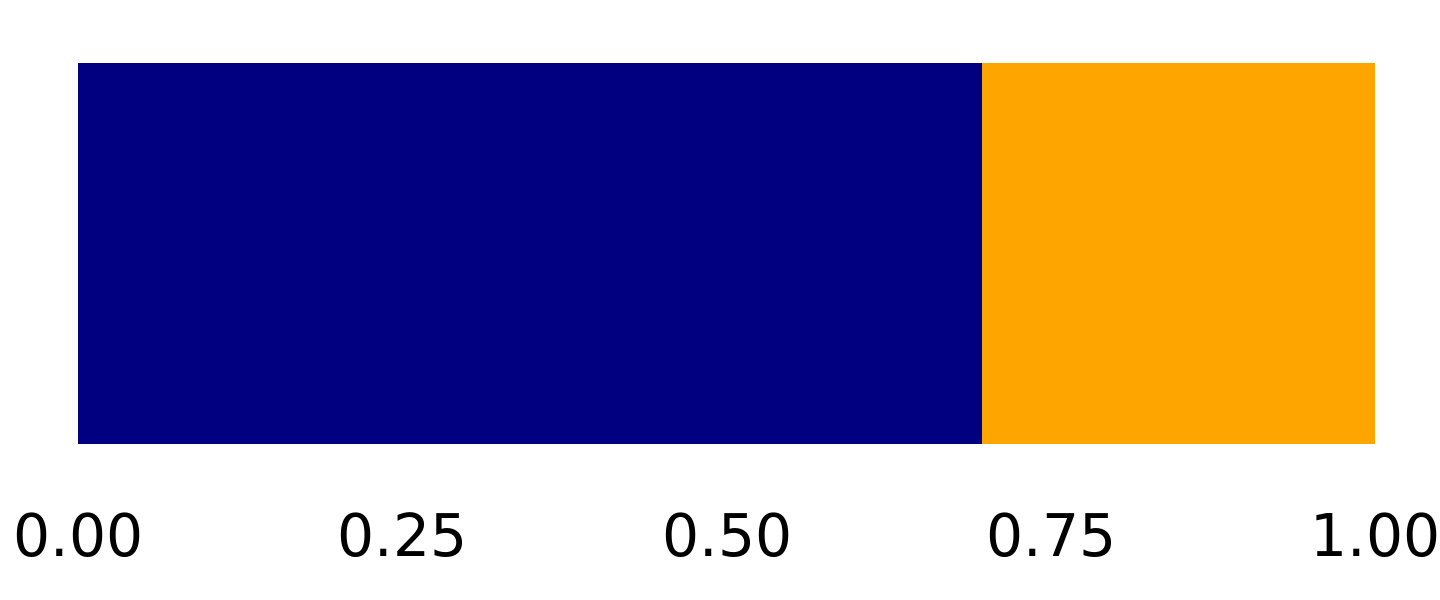

In [214]:
library(ggplot2)
options(repr.plot.width = 12.0, repr.plot.height = 5)
df = data.frame(class=factor(c("Intergenic", "Intronic"), levels=c("Intergenic", "Intronic")), value=c(469,1080), id=c(1,1))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_blank(), axis.text.x=element_text(size=35), axis.title=element_text(size=25), legend.position = "none")
p = p + scale_fill_manual(name=" ", values=c("orange", "navyblue"))
p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
#p = p + geom_text(aes(label=c("Intronic: n = 383 (40%)"), y=c(0.20), x=1), size = 8, col="white")
#p = p + geom_text(aes(label=c("Intergenic: n = 565 (60%)"), y=c(0.70), x=1), size = 8, col="white")
#p = p + geom_text(aes(label=c("Neoblast TF: n = 43 (0.1%)\nTF: n = 508 (1.9%)\nNon-TF: n =27488 (98%)"), y=c(0.35), x=2), size = 7, col="white")
p

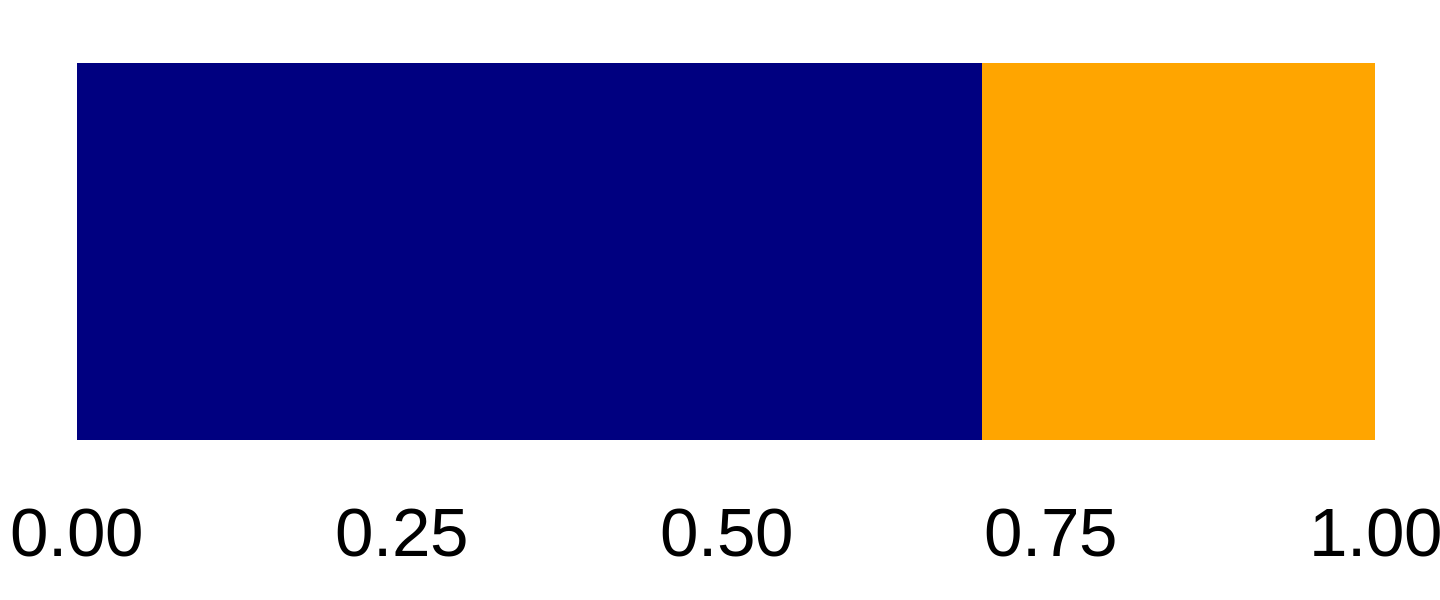

In [7]:
library(ggplot2)
options(repr.plot.width = 12.0, repr.plot.height = 5)
df = data.frame(class=factor(c("Intergenic", "Intronic"), levels=c("Intergenic", "Intronic")), value=c(469,1080), id=c(1,1))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_blank(), axis.text.x=element_text(size=41.5), axis.title=element_text(size=25), legend.position = "none")
p = p + scale_fill_manual(name=" ", values=c("orange", "navyblue"))
p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
#p = p + geom_text(aes(label=c("Intronic: n = 383 (40%)"), y=c(0.20), x=1), size = 8, col="white")
#p = p + geom_text(aes(label=c("Intergenic: n = 565 (60%)"), y=c(0.70), x=1), size = 8, col="white")
#p = p + geom_text(aes(label=c("Neoblast TF: n = 43 (0.1%)\nTF: n = 508 (1.9%)\nNon-TF: n =27488 (98%)"), y=c(0.35), x=2), size = 7, col="white")
p

In [14]:
min(abs(enhancer_annotation_FACS$distanceToTSS))
max(abs(enhancer_annotation_FACS$distanceToTSS))

[1] 0

[1] 88958

# 3. Section

In [5]:
X1_table = read.csv("/hydra/atac_sexual_final/footprinting/BINDetect_X1/X1_table.csv")
X1_table_bound = subset(X1_table,X1_table$X1_bound == 1)

In [20]:
write.table(X1_table_bound[,1:3], "/hydra/atac_sexual_final/footprinting/bound_motifs.bed", row.names = FALSE, col.names=FALSE)

In [57]:
library(ChIPseeker)
library(GenomicFeatures)
library(rtracklayer)

ERROR: Error in library(ChIPseeker): there is no package called ‘ChIPseeker’


In [11]:
txdb_final = makeTxDbFromGFF("/hydra/neiro_bam/stringtie_merged_R.gtf")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
OK



In [22]:
bound_motifs <- readPeakFile("/hydra/atac_sexual_final/footprinting/bound_motifs.bed")

In [23]:
bound_anno <- annotatePeak(bound_motifs, tssRegion=c(-1000, 1000), TxDb=txdb_final)

>> preparing features information...		 2021-08-03 15:31:34 
>> identifying nearest features...		 2021-08-03 15:31:35 
>> calculating distance from peak to TSS...	 2021-08-03 15:31:36 
>> assigning genomic annotation...		 2021-08-03 15:31:36 
>> assigning chromosome lengths			 2021-08-03 15:31:47 
>> done...					 2021-08-03 15:31:47 


In [25]:
bound_anno = as.data.frame(bound_anno)

In [26]:
bound_anno

seqnames       start    end      width strand
1     dd_Smes_g4_1    3643179  3643186 8     *     
2     dd_Smes_g4_1    4704887  4704894 8     *     
3     dd_Smes_g4_1    5109550  5109557 8     *     
4     dd_Smes_g4_1    5109573  5109580 8     *     
5     dd_Smes_g4_1    5109803  5109810 8     *     
6     dd_Smes_g4_1    5122587  5122594 8     *     
7     dd_Smes_g4_1    8172872  8172879 8     *     
8     dd_Smes_g4_1   15276690 15276697 8     *     
9     dd_Smes_g4_10    965088   965095 8     *     
10    dd_Smes_g4_103   397246   397253 8     *     
11    dd_Smes_g4_108   246770   246777 8     *     
12    dd_Smes_g4_109  2110370  2110377 8     *     
13    dd_Smes_g4_109  2110592  2110599 8     *     
14    dd_Smes_g4_11   5697774  5697781 8     *     
15    dd_Smes_g4_110   193846   193853 8     *     
16    dd_Smes_g4_110  1486691  1486698 8     *     
17    dd_Smes_g4_111  1403825  1403832 8     *     
18    dd_Smes_g4_111  1403865  1403872 8     *     
19    dd_Smes_g4_112   936135   936142 8     *     
20    dd_Smes_g4_114  1178496  1178503 8     *     
21    dd_Smes_g4_115   991428   991435 8     *     
22    dd_Smes_g4_12   8178710  8178717 8     *     
23    dd_Smes_g4_125  1047895  1047902 8     *     
24    dd_Smes_g4_128  1408234  1408241 8     *     
25    dd_Smes_g4_128  1408510  1408517 8     *     
26    dd_Smes_g4_13   6624410  6624417 8     *     
27    dd_Smes_g4_13   7892538  7892545 8     *     
28    dd_Smes_g4_131   651015   651022 8     *     
29    dd_Smes_g4_131  1686513  1686520 8     *     
30    dd_Smes_g4_133   485602   485609 8     *     
⋮     ⋮              ⋮        ⋮        ⋮     ⋮     
22460 dd_Smes_g4_74  2877821  2877826  6     *     
22461 dd_Smes_g4_75   395114   395119  6     *     
22462 dd_Smes_g4_75   713189   713194  6     *     
22463 dd_Smes_g4_76  1475788  1475793  6     *     
22464 dd_Smes_g4_76  2507787  2507792  6     *     
22465 dd_Smes_g4_76  2514788  2514793  6     *     
22466 dd_Smes_g4_76  2519351  2519356  6     *     
22467 dd_Smes_g4_76  2616391  2616396  6     *     
22468 dd_Smes_g4_78  2574800  2574805  6     *     
22469 dd_Smes_g4_8   8597590  8597595  6     *     
22470 dd_Smes_g4_8   8653265  8653270  6     *     
22471 dd_Smes_g4_8   8669560  8669565  6     *     
22472 dd_Smes_g4_80  1514585  1514590  6     *     
22473 dd_Smes_g4_80  1623176  1623181  6     *     
22474 dd_Smes_g4_81  2593928  2593933  6     *     
22475 dd_Smes_g4_81  2594975  2594980  6     *     
22476 dd_Smes_g4_82  1778478  1778483  6     *     
22477 dd_Smes_g4_83   402511   402516  6     *     
22478 dd_Smes_g4_83   419273   419278  6     *     
22479 dd_Smes_g4_83   664621   664626  6     *     
22480 dd_Smes_g4_83   737786   737791  6     *     
22481 dd_Smes_g4_83  2774162  2774167  6     *     
22482 dd_Smes_g4_84  1224451  1224456  6     *     
22483 dd_Smes_g4_86  1431169  1431174  6     *     
22484 dd_Smes_g4_86  2370784  2370789  6     *     
22485 dd_Smes_g4_91   303639   303644  6     *     
22486 dd_Smes_g4_91   323129   323134  6     *     
22487 dd_Smes_g4_94  2316127  2316132  6     *     
22488 dd_Smes_g4_97  1055685  1055690  6     *     
22489 dd_Smes_g4_97  1055796  1055801  6     *     
      annotation                                             geneChr geneStart
1     Exon (MSTRG.170.1/MSTRG.170, exon 12 of 14)             1       3641637 
2     Promoter                                                1       4701951 
3     Intron (SMEST026880001.1/MSTRG.238, intron 6 of 13)     1       5108245 
4     Intron (SMEST026880001.1/MSTRG.238, intron 6 of 13)     1       5108245 
5     Intron (SMEST026880001.1/MSTRG.238, intron 6 of 13)     1       5108245 
6     Exon (SMEST026880001.1/MSTRG.238, exon 9 of 14)         1       5108245 
7     Distal Intergenic                                       1       8168629 
8     Distal Intergenic                                       1      15283770 
9     Promoter                                                2        

# Motifs

In [4]:
enhancer_annotation_FACS = read.csv("/hydra/enhancer_regions/enhancer_annotation_july21.csv")

In [9]:
tf_prop = read.csv("/hydra/TF_data/Transcription_factors_01072021_values.csv")[,2:length(tf_prop)]

In [11]:
nrow(enhancer_annotation_FACS)

[1] 4326

In [14]:
nrow(subset(enhancer_annotation_FACS, enhancer_annotation_FACS$geneId %in% tf_prop$Neiro))

[1] 804

In [15]:
nrow(tf_prop)

[1] 551

In [29]:
length(levels(as.factor(read.table("/hydra/sexual_genome_annotation_files/ncrna_Neiro/gffcmp.stringtie_merged.gtf.tmap", head=TRUE)$qry_gene_id)))

[1] 28039

In [30]:
551/28039

[1] 0.0196512

In [33]:
28039-551

[1] 27488

In [31]:
804/4326

[1] 0.185853

In [32]:
4326-804

[1] 3522

In [1]:
804-161

[1] 643

In [2]:
551-43

[1] 508

In [ ]:
43 and 161

In [16]:
43/28039

[1] 0.001533578

In [6]:
161/4326

[1] 0.03721683

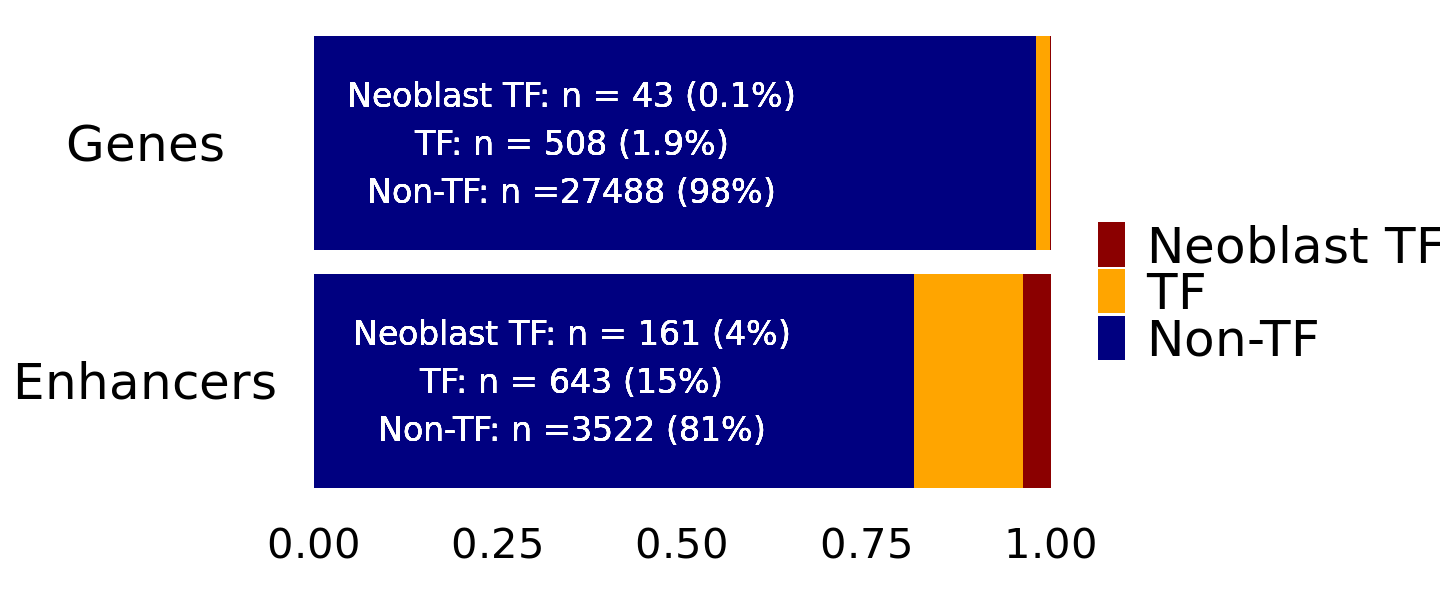

In [18]:
library(ggplot2)
options(repr.plot.width = 12.0, repr.plot.height = 5)
df = data.frame(class=factor(c("Neoblast TF", "TF", "Non-TF"), levels=c("Neoblast TF", "TF", "Non-TF")), value=c(161, 643, 3522, 41, 508, 27488), id = c("Enhancers", "Enhancers", "Enhancers", "Genes", "Genes", "Genes"))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=30))
p = p + scale_fill_manual(name=" ", values=c("red4", "orange", "navyblue"))
p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
#p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
p = p + geom_text(aes(label=c("Neoblast TF: n = 161 (4%)\nTF: n = 643 (15%)\nNon-TF: n =3522 (81%)"), y=c(0.35), x=1), size = 7, col="white")
p = p + geom_text(aes(label=c("Neoblast TF: n = 43 (0.1%)\nTF: n = 508 (1.9%)\nNon-TF: n =27488 (98%)"), y=c(0.35), x=2), size = 7, col="white")
p

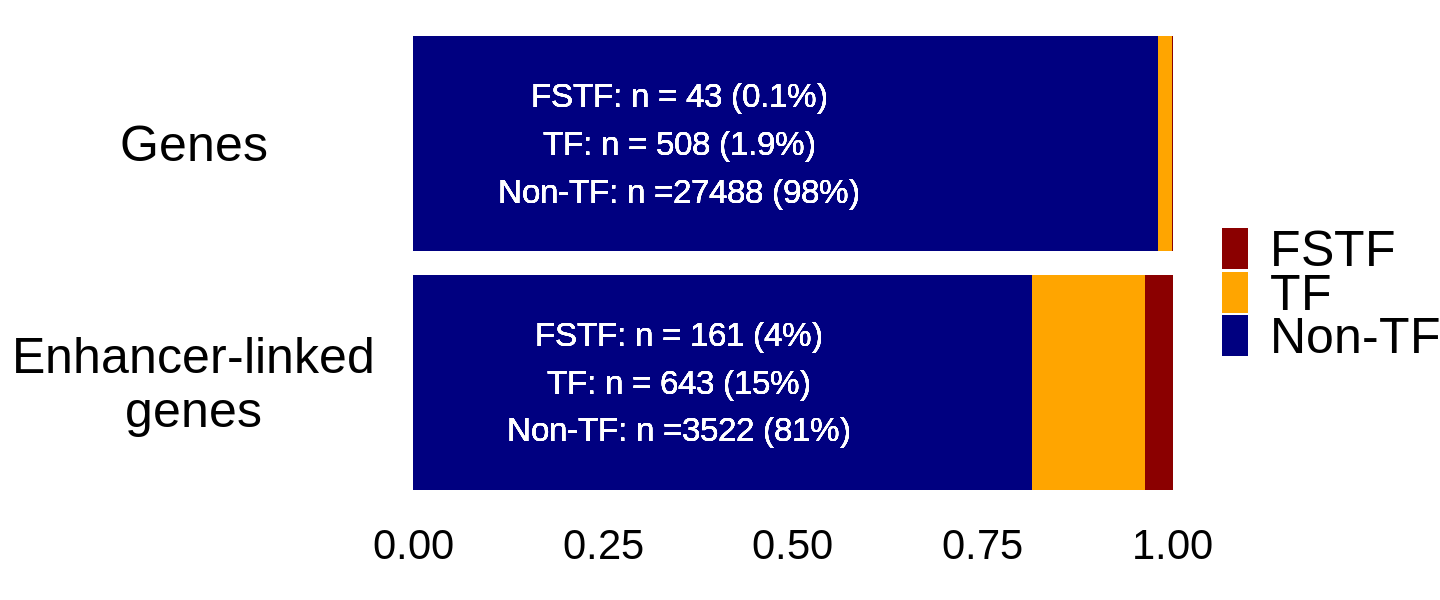

In [12]:
library(ggplot2)
options(repr.plot.width = 12.0, repr.plot.height = 5)
df = data.frame(class=factor(c("FSTF", "TF", "Non-TF"), levels=c("FSTF", "TF", "Non-TF")), value=c(161, 643, 3522, 41, 508, 27488), id = c("Enhancer-linked\ngenes", "Enhancer-linked\ngenes", "Enhancer-linked\ngenes", "Genes", "Genes", "Genes"))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=30))
p = p + scale_fill_manual(name=" ", values=c("red4", "orange", "navyblue"))
p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
#p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
p = p + geom_text(aes(label=c("FSTF: n = 161 (4%)\nTF: n = 643 (15%)\nNon-TF: n =3522 (81%)"), y=c(0.35), x=1), size = 7, col="white")
p = p + geom_text(aes(label=c("FSTF: n = 43 (0.1%)\nTF: n = 508 (1.9%)\nNon-TF: n =27488 (98%)"), y=c(0.35), x=2), size = 7, col="white")
p

In [5]:
dt = as.table(matrix(c(161, 643, 3522, 43, 508, 27488), nrow=2, byrow=TRUE))

In [7]:
chisq.test(dt)


	Pearson's Chi-squared test

data:  dt
X-squared = 2660.4, df = 2, p-value < 2.2e-16


# 2. ATAC-seq

In [ ]:
ATACrandom_july21.tab

In [21]:
atacenhancer = read.table("/hydra/enhancer_regions/ATACatenhancers_july21.tab", skip=3)
atacenhancer_mean = apply(atacenhancer, 1, mean, na.rm=TRUE)

In [24]:
length(atacenhancer_mean)

[1] 5529

In [22]:
atacrandom = read.table("/hydra/enhancer_regions/ATACrandom_july21.tab", skip=3)
atacrandom_mean = apply(atacrandom, 1, mean, na.rm=TRUE)

In [23]:
length(atacrandom_mean)

[1] 10000

In [25]:
df = data.frame("class" = as.factor(c(rep("1", 5529), rep("2", 10000))), "signal" = c(atacenhancer_mean, atacrandom_mean))

Warning message:
“Removed 37 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 37 rows containing non-finite values (stat_compare_means).”
Warning message:
“Removed 329 rows containing missing values (geom_point).”


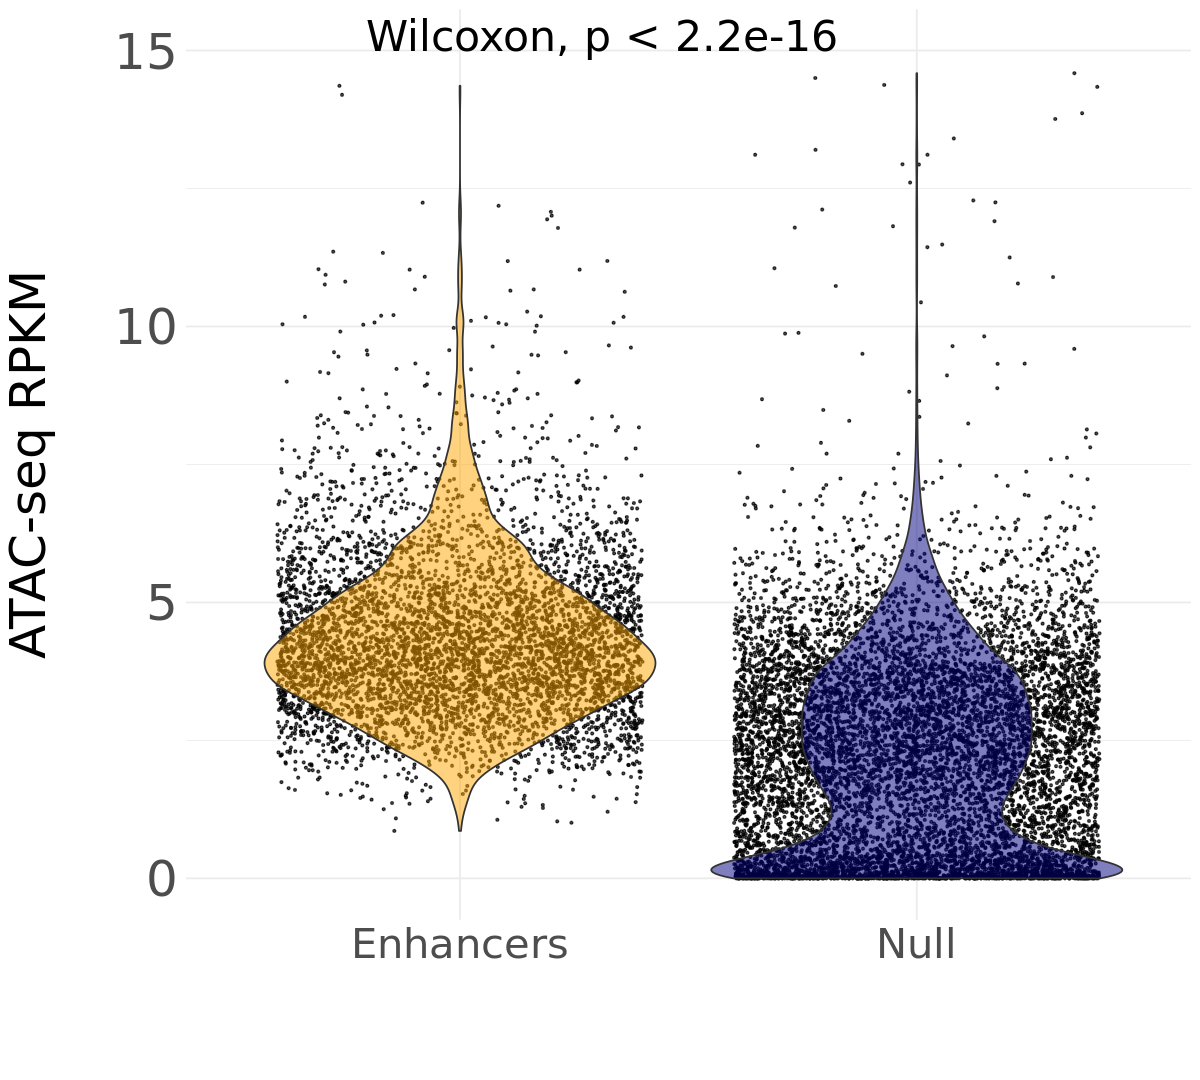

In [32]:
library(ggpubr)
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 9)
#my_comparisons = list( c("0", "1"), c("0", "2"), c("1", "2"))
p = ggplot(df, aes(x=class, y=signal, fill=class)) +geom_jitter(size=0.5, alpha=0.7) + geom_violin(alpha=0.5)
p = p + theme_minimal()
#p = p + scale_color_manual(name=c(" "), values=c("black", "red"))
p = p + scale_fill_manual(name=c(" "), values=c("orange", "navyblue"))
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=30), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=30), legend.title=element_text(size=30), legend.text=element_text(size=25), legend.position="none")
p = p + xlab("\n")+ylab("ATAC-seq RPKM\n")+ylim(0,15)
#p = p + geom_hline(yintercept=0, linetype="dashed", size=1.25)
p = p + scale_x_discrete(labels=c("Enhancers", "Null"))
p = p + stat_compare_means(size=9)
p

In [1]:
atacenhancer = read.table("/hydra/enhancer_regions/ATACfootenhancers_july21.tab", skip=3)
atacenhancer_mean = apply(atacenhancer, 1, mean, na.rm=TRUE)

In [5]:
length(atacenhancer_mean)

[1] 5529

In [2]:
atacrandom = read.table("/hydra/enhancer_regions/ATACfootrandom_july21.tab", skip=3)
atacrandom_mean = apply(atacrandom, 1, mean, na.rm=TRUE)

In [6]:
length(atacrandom_mean)

[1] 9992

In [7]:
df = data.frame("class" = as.factor(c(rep("1", 5529), rep("2", 9992))), "signal" = c(atacenhancer_mean, atacrandom_mean))

Warning message:
“Removed 11 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 11 rows containing non-finite values (stat_compare_means).”
Warning message:
“Removed 296 rows containing missing values (geom_point).”


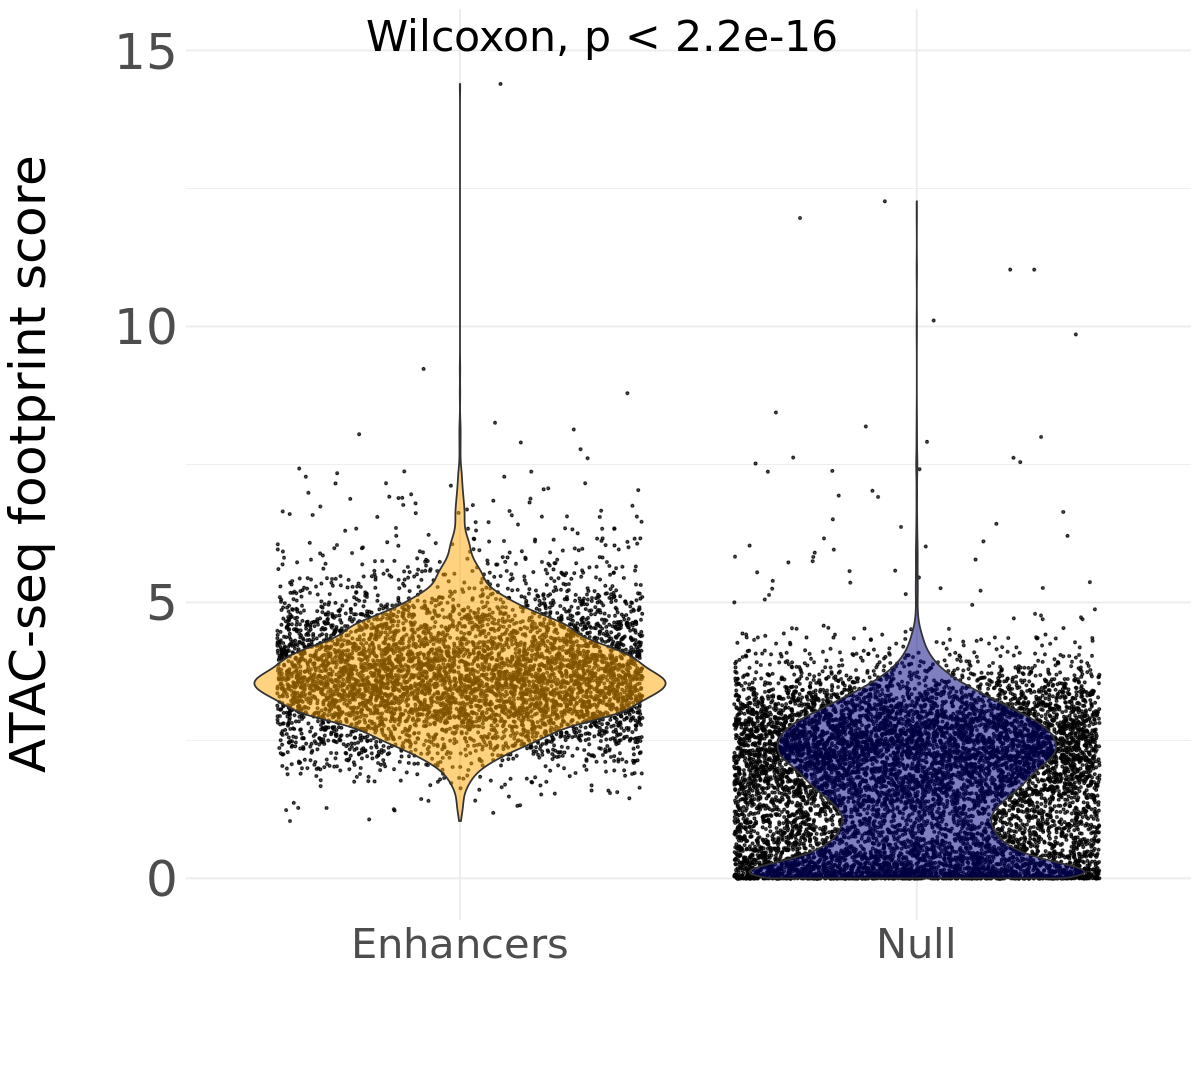

In [9]:
library(ggpubr)
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 9)
#my_comparisons = list( c("0", "1"), c("0", "2"), c("1", "2"))
p = ggplot(df, aes(x=class, y=signal, fill=class)) +geom_jitter(size=0.5, alpha=0.7) + geom_violin(alpha=0.5)
p = p + theme_minimal()
#p = p + scale_color_manual(name=c(" "), values=c("black", "red"))
p = p + scale_fill_manual(name=c(" "), values=c("orange", "navyblue"))
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=30), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=30), legend.title=element_text(size=30), legend.text=element_text(size=25), legend.position="none")
p = p + xlab("\n")+ylab("ATAC-seq footprint score\n")+ylim(0,15)
#p = p + geom_hline(yintercept=0, linetype="dashed", size=1.25)
p = p + scale_x_discrete(labels=c("Enhancers", "Null"))
p = p + stat_compare_means(size=9)
p

# Footprinting

In [2]:
x1bind = read.table("/hydra/atac_sexual_final/footprinting/BINDetect_X1/bindetect_results_names.txt")

In [3]:
x1bind$percent = (x1bind$X1_bound/x1bind$total_tfbs)*100

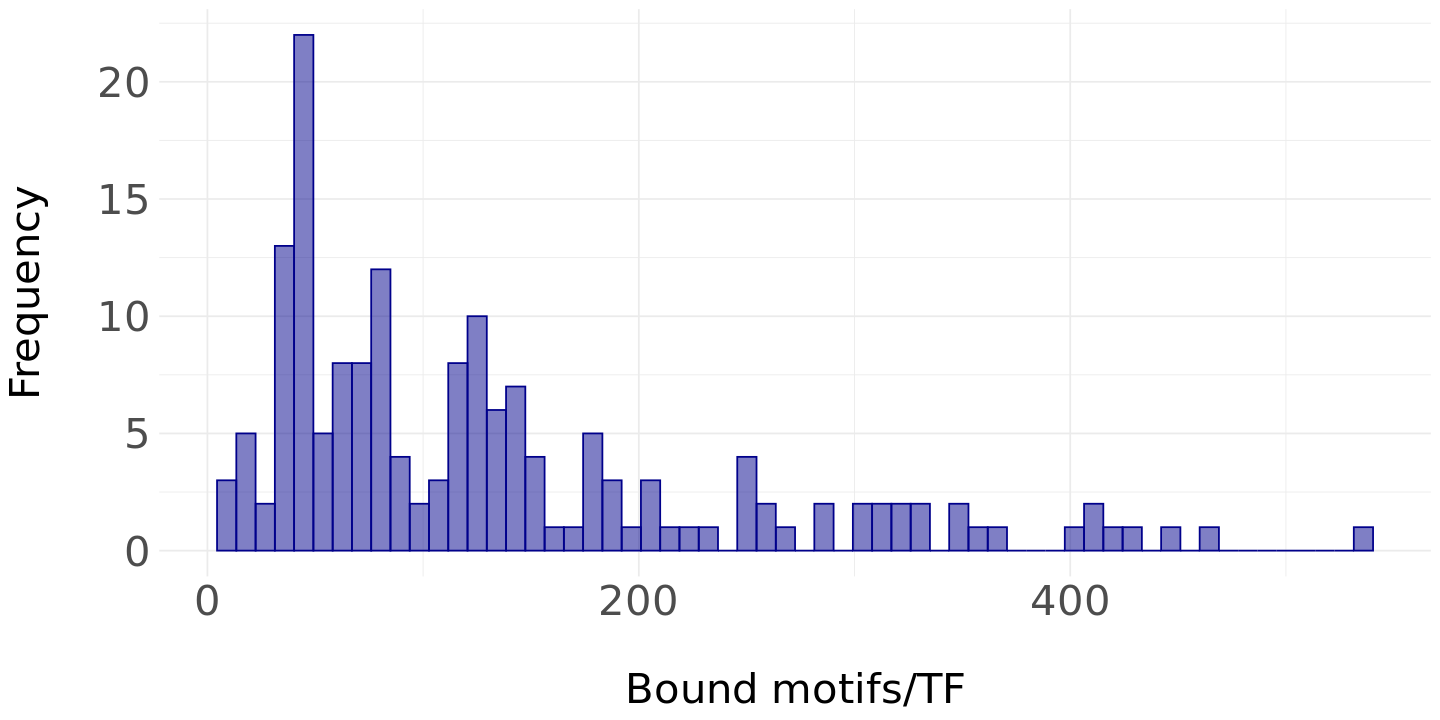

In [8]:
library(ggplot2)
options(repr.plot.width = 12.0, repr.plot.height = 6.0)
p = ggplot(x1bind, aes(x=X1_bound))+geom_histogram(col="darkblue", fill="darkblue", alpha = 0.5, bins=60)+theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.position="none", legend.title=element_text(), legend.text=element_text(size=25))
p = p + xlab("\nBound motifs/TF")+ylab("Frequency\n")
p

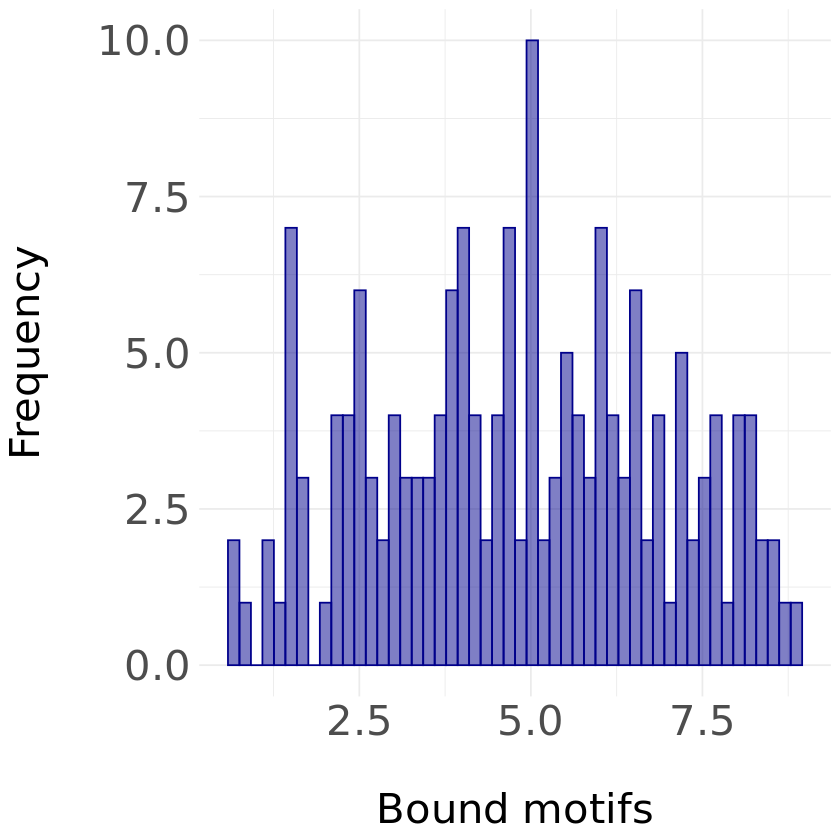

In [21]:
library(ggplot2)
options(repr.plot.width = 7.0, repr.plot.height = 7.0)
p = ggplot(x1bind, aes(x=percent))+geom_histogram(col="darkblue", fill="darkblue", alpha = 0.5, bins=50)+theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.position="none", legend.title=element_text(), legend.text=element_text(size=25))
p = p + xlab("\nBound motifs")+ylab("Frequency\n")
p

In [10]:
library(GenomicFeatures)
library(Gviz)
library(rtracklayer)

In [11]:
txdb = makeTxDbFromGFF("/hydra/sexual_genome_annotation_files/ncrna_Neiro/stringtie.Bioconductor.gtf", format = "gtf")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
OK



In [12]:
x1_foot = import("/hydra/atac_sexual_final/footprinting/x1_footprints.bw")
options(ucscChromosomeNames=FALSE)
x1_foot_track = DataTrack(x1_foot, type = "hist", name="X1 Footprints", fill.histogram = "navyblue", col.histogram= "navyblue")

In [13]:
options(ucscChromosomeNames=FALSE)
#x1_foot_track = DataTrack(x1_foot, type = "l", name="X1 Footprints", fill.histogram = "navyblue", col.histogram= "navyblue", chromosome="dd_Smes_g4_189")
x1_atac_track = AnnotationTrack(range="/hydra/atac_sexual_final/x1/x1merged.marked.bam", name="X1 ATAC-seq reads", fill="navyblue")

In [14]:
options(ucscChromosomeNames=FALSE)
sp5bound = import.bed("/hydra/atac_sexual_final/footprinting/motif_beds/sp5.bed")
sp5bound = AnnotationTrack(sp5bound, name="sp5", fill="black", rotation.title=1)

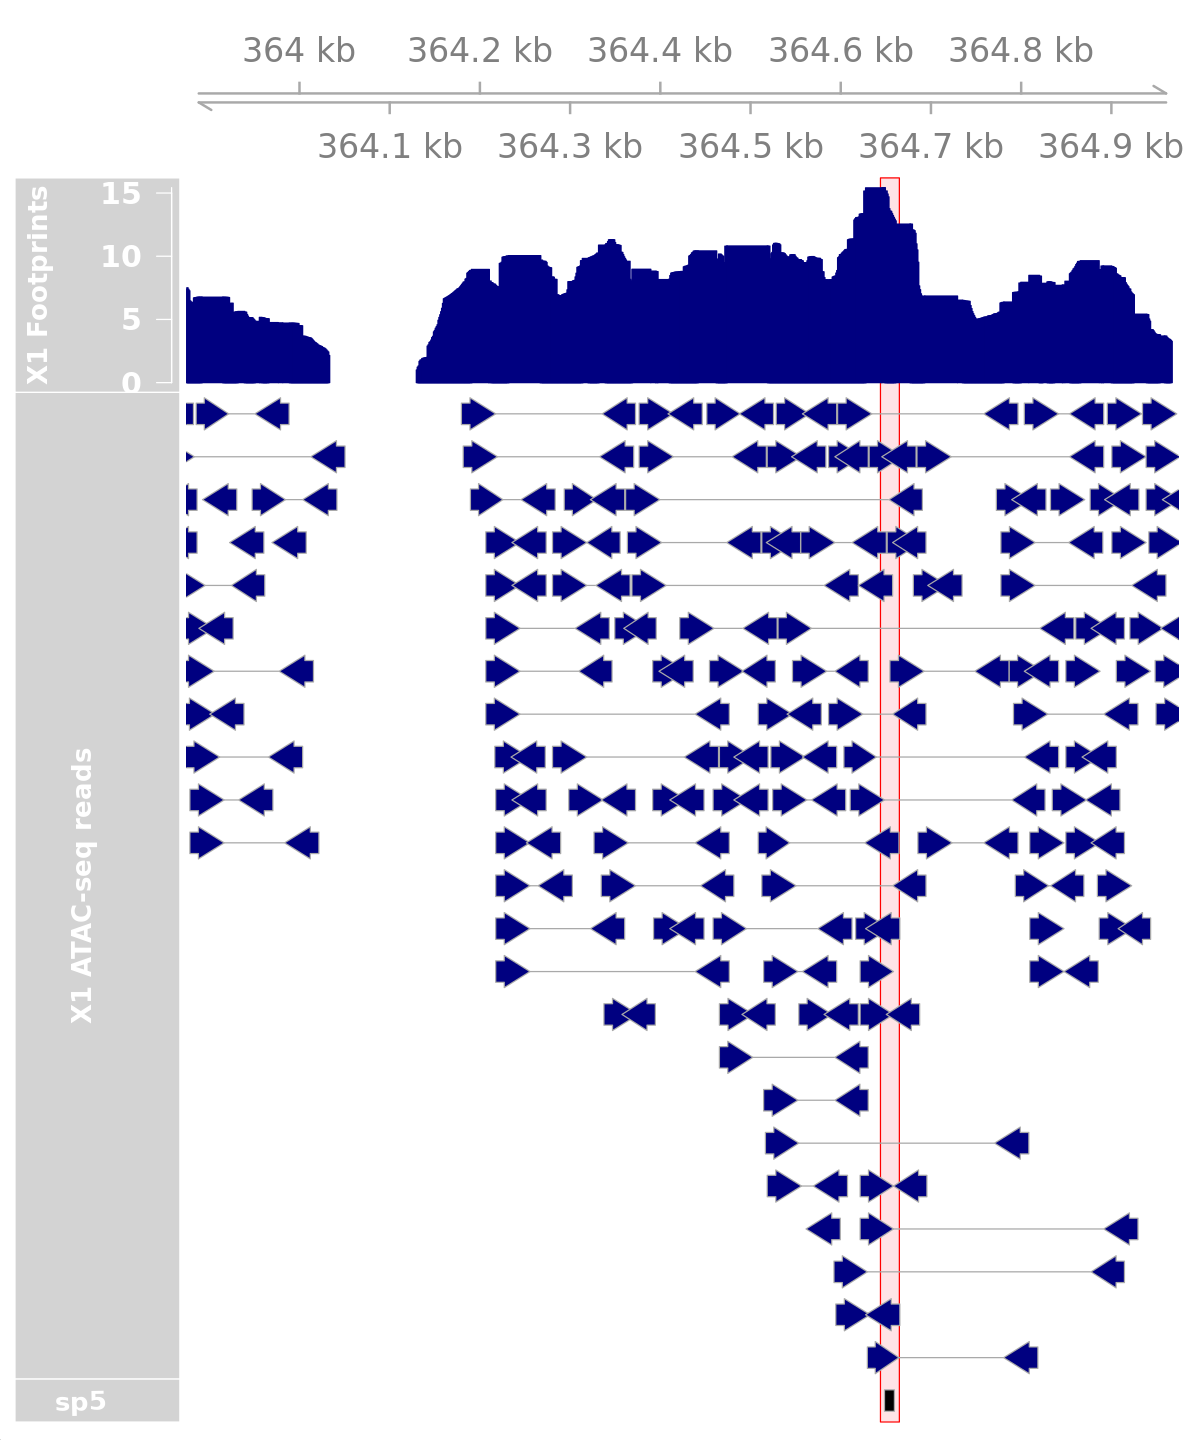

In [25]:
options(repr.plot.width = 10, repr.plot.height = 12)
gtrack <- GenomeAxisTrack(cex=2)
ht <- HighlightTrack(trackList = list(x1_foot_track,  x1_atac_track, sp5bound),start = 364375+270, width = 20, chromosome = "dd_Smes_g4_189")
plotTracks(c(gtrack, ht), from = 364375-500, to = 364375+600, cex.axis=1.5, cex.title=1.3, chromosome = "dd_Smes_g4_189")

#plotTracks(c(gtrack, ht , txTr, x1RNA_track), transcriptAnnotation = "symbol", shape = "arrow", chromosome="dd_Smes_g4_189", from=364375-1000, to=364375+5000, cex.group=1.75, type="hist", window = -1, windowSize = 1, 
                       #cex.axis=1.5, cex.title=1.3)

In [28]:
zic1bound = import.bed("/hydra/atac_sexual_final/footprinting/motif_beds/zic-1.bed")
zic1bound = AnnotationTrack(zic1bound, name="zic-1", fill="black", rotation.title=1)
egr1bound = import.bed("/hydra/atac_sexual_final/footprinting/motif_beds/egr-1.bed")
egr1bound = AnnotationTrack(egr1bound, name="egr-1", fill="black", rotation.title=1)
ovo1bound = import.bed("/hydra/atac_sexual_final/footprinting/motif_beds/ovo-1.bed")
ovo1bound = AnnotationTrack(ovo1bound, name="ovo-1", fill="black", rotation.title=1)

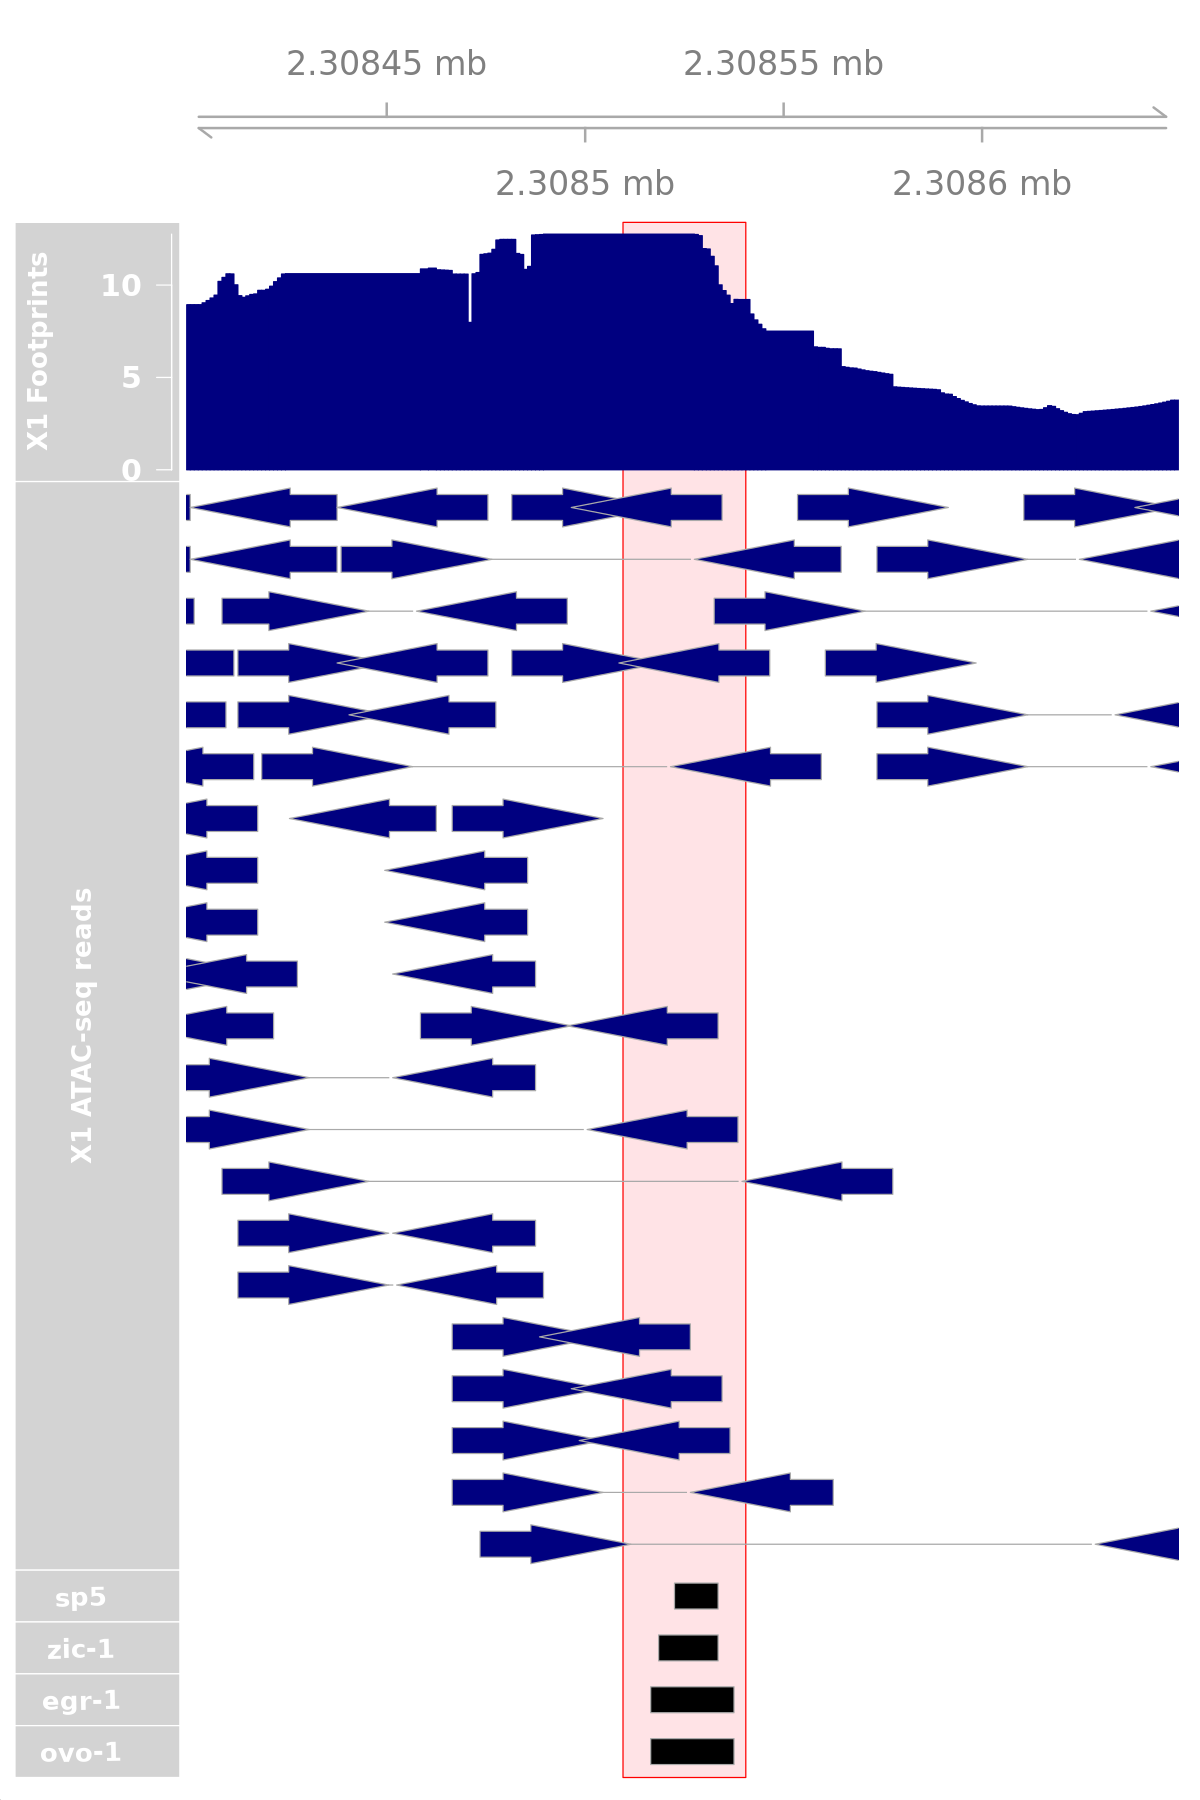

In [37]:
options(repr.plot.width = 10, repr.plot.height = 15)
gtrack <- GenomeAxisTrack(cex=2)
ht <- HighlightTrack(trackList = list(x1_foot_track,  x1_atac_track, sp5bound, zic1bound, egr1bound, ovo1bound),start = 2308510, width = 30,chromosome = "dd_Smes_g4_74")
plotTracks(c(gtrack, ht), from = 2308400, to =  2308650, cex.axis=1.5, cex.title=1.3, chromosome = "dd_Smes_g4_74")

#plotTracks(c(gtrack, ht , txTr, x1RNA_track), transcriptAnnotation = "symbol", shape = "arrow", chromosome="dd_Smes_g4_189", from=364375-1000, to=364375+5000, cex.group=1.75, type="hist", window = -1, windowSize = 1, 
                       #cex.axis=1.5, cex.title=1.3)

## GO analysis 

In [17]:
library(topGO)

In [18]:
enhancer_annotation_FACS = read.csv("/hydra/enhancer_regions/enhancer_annotation_july21.csv")

In [19]:
all.GO = read.csv("/hydra/GO/interpro/ncrna_coding_May2021.GO.tab", sep="\t", header=FALSE)
new.GO = subset(all.GO, all.GO$V1 %in% enhancer_annotation_FACS$transcriptId)

In [20]:
nrow(all.GO)
nrow(new.GO)

[1] 11925

[1] 399

In [21]:
geneID2GO = readMappings(file="/hydra/GO/interpro/ncrna_coding_May2021.GO.tab")
gene_all_names = names(geneID2GO)

In [22]:
length(gene_all_names)

[1] 11925

In [23]:
gene_new_names = subset(gene_all_names, gene_all_names %in% new.GO$V1)

In [24]:
geneList = as.factor(as.integer(gene_all_names %in% gene_new_names))
names(geneList) <- gene_all_names
str(geneList)

 Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "names")= chr [1:11925] "MSTRG.10475.5" "MSTRG.10475.1" "MSTRG.6511.1" "MSTRG.22035.25" ...


In [25]:
BP_GOdata <- new("topGOdata", description = "Simple session", ontology = "BP",
 allGenes = geneList, annot = annFUN.gene2GO,  gene2GO = geneID2GO)
resultFisher <- runTest(BP_GOdata, algorithm = "classic", statistic = "fisher")
Res_BP <- GenTable(BP_GOdata, classicFisher = resultFisher, ranksOf = "classicFisher", topNodes = 10)
Res_BP


Building most specific GOs .....

	( 395 GO terms found. )


Build GO DAG topology ..........

	( 1319 GO terms and 2696 relations. )


Annotating nodes ...............

	( 5437 genes annotated to the GO terms. )


			 -- Classic Algorithm -- 

		 the algorithm is scoring 275 nontrivial nodes
		 parameters: 
			 test statistic: fisher



GO.ID      Term                                        Annotated Significant
1  GO:0009889 regulation of biosynthetic process          272       36         
2  GO:0010556 regulation of macromolecule biosynthetic... 272       36         
3  GO:0031326 regulation of cellular biosynthetic proc... 272       36         
4  GO:2000112 regulation of cellular macromolecule bio... 272       36         
5  GO:0010468 regulation of gene expression               277       36         
6  GO:0006355 regulation of transcription, DNA-templat... 265       35         
7  GO:0019219 regulation of nucleobase-containing comp... 265       35         
8  GO:0051252 regulation of RNA metabolic process         265       35         
9  GO:1903506 regulation of nucleic acid-templated tra... 265       35         
10 GO:2001141 regulation of RNA biosynthetic process      265       35         
   Expected classicFisher
1  7.60     9.5e-16      
2  7.60     9.5e-16      
3  7.60     9.5e-16      
4  7.60     9.5e-16      
5  7.74     1.7e-15      
6  7.41     2.8e-15      
7  7.41     2.8e-15      
8  7.41     2.8e-15      
9  7.41     2.8e-15      
10 7.41     2.8e-15

In [26]:
CC_GOdata <- new("topGOdata", description = "Simple session", ontology = "CC",
 allGenes = geneList, annot = annFUN.gene2GO,  gene2GO = geneID2GO)
resultFisher <- runTest(CC_GOdata, algorithm = "classic", statistic = "fisher")
Res_CC <- GenTable(CC_GOdata, classicFisher = resultFisher, ranksOf = "classicFisher", topNodes = 10)
Res_CC


Building most specific GOs .....

	( 158 GO terms found. )


Build GO DAG topology ..........

	( 350 GO terms and 633 relations. )


Annotating nodes ...............

	( 2777 genes annotated to the GO terms. )


			 -- Classic Algorithm -- 

		 the algorithm is scoring 56 nontrivial nodes
		 parameters: 
			 test statistic: fisher



GO.ID      Term                                        Annotated Significant
1  GO:0018995 host cellular component                     50        5          
2  GO:0033643 host cell part                              50        5          
3  GO:0033646 host intracellular part                     50        5          
4  GO:0033647 host intracellular organelle                50        5          
5  GO:0033648 host intracellular membrane-bounded orga... 50        5          
6  GO:0042025 host cell nucleus                           50        5          
7  GO:0043656 host intracellular region                   50        5          
8  GO:0043657 host cell                                   50        5          
9  GO:0099023 vesicle tethering complex                    9        2          
10 GO:0017119 Golgi transport complex                      2        1          
   Expected classicFisher
1  1.48     0.015        
2  1.48     0.015        
3  1.48     0.015        
4  1.48     0.015        
5  1.48     0.015        
6  1.48     0.015        
7  1.48     0.015        
8  1.48     0.015        
9  0.27     0.027        
10 0.06     0.058

In [27]:
MP_GOdata <- new("topGOdata", description = "Simple session", ontology = "MF",
 allGenes = geneList, annot = annFUN.gene2GO,  gene2GO = geneID2GO)
resultFisher <- runTest(MP_GOdata, algorithm = "classic", statistic = "fisher")
Res_MP <- GenTable(MP_GOdata, classicFisher = resultFisher, ranksOf = "classicFisher", topNodes = 10)
Res_MP


Building most specific GOs .....

	( 480 GO terms found. )


Build GO DAG topology ..........

	( 779 GO terms and 1012 relations. )


Annotating nodes ...............

	( 10024 genes annotated to the GO terms. )


			 -- Classic Algorithm -- 

		 the algorithm is scoring 205 nontrivial nodes
		 parameters: 
			 test statistic: fisher



GO.ID      Term                                        Annotated Significant
1  GO:0003677 DNA binding                                  569       69        
2  GO:0003676 nucleic acid binding                        1511      114        
3  GO:0003700 DNA-binding transcription factor activit...  152       20        
4  GO:0140110 transcription regulator activity             175       21        
5  GO:0097159 organic cyclic compound binding             3030      146        
6  GO:1901363 heterocyclic compound binding               3030      146        
7  GO:0043565 sequence-specific DNA binding                 95       12        
8  GO:0098772 molecular function regulator                 354       27        
9  GO:0005488 binding                                     6539      253        
10 GO:0000981 DNA-binding transcription factor activit...    3        2        
   Expected classicFisher
1   19.81   1.3e-20      
2   52.61   3.9e-17      
3    5.29   2.9e-07      
4    6.09   7.0e-07      
5  105.49   1.9e-06      
6  105.49   1.9e-06      
7    3.31   0.00011      
8   12.33   0.00011      
9  227.66   0.00195      
10   0.10   0.00354

In [28]:
Res_BP$classicFisher
y=as.numeric(Res_BP$classicFisher)
#y[1:3] = 1e-30
y = -log10(y)
number = Res_BP$Significant

[1] "9.5e-16" "9.5e-16" "9.5e-16" "9.5e-16" "1.7e-15" "2.8e-15" "2.8e-15"
 [8] "2.8e-15" "2.8e-15" "2.8e-15"

In [29]:
Res_BP$Term[1] = "Regulation of biosynthetic process"

In [30]:
Res_BP$Term[2] = "Regulation of macromolecule\nbiosynthetic process "

In [31]:
Res_BP$Term[3] = "Regulation of cellular\nbiosynthetic process"

In [32]:
Res_BP$Term[4] = "Regulation of cellular macromolecule \nbiosynthetic process "

In [33]:
Res_BP$Term[5] = "Regulation of gene expression"

In [34]:
Res_BP$Term[6] = "Regulation of transcription,\nDNA-templated"

In [35]:
Res_BP$Term[7] = "Regulation of nucleobase-containing\ncompound metabolic process"

In [36]:
Res_BP$Term[8] = "Regulation of RNA\nmetabolic process"

In [37]:
Res_BP$Term[9] = "Regulation of nucleic\nacid-templated transcription"

In [38]:
Res_BP$Term[10] = "Regulation of RNA\nbiosynthetic process"

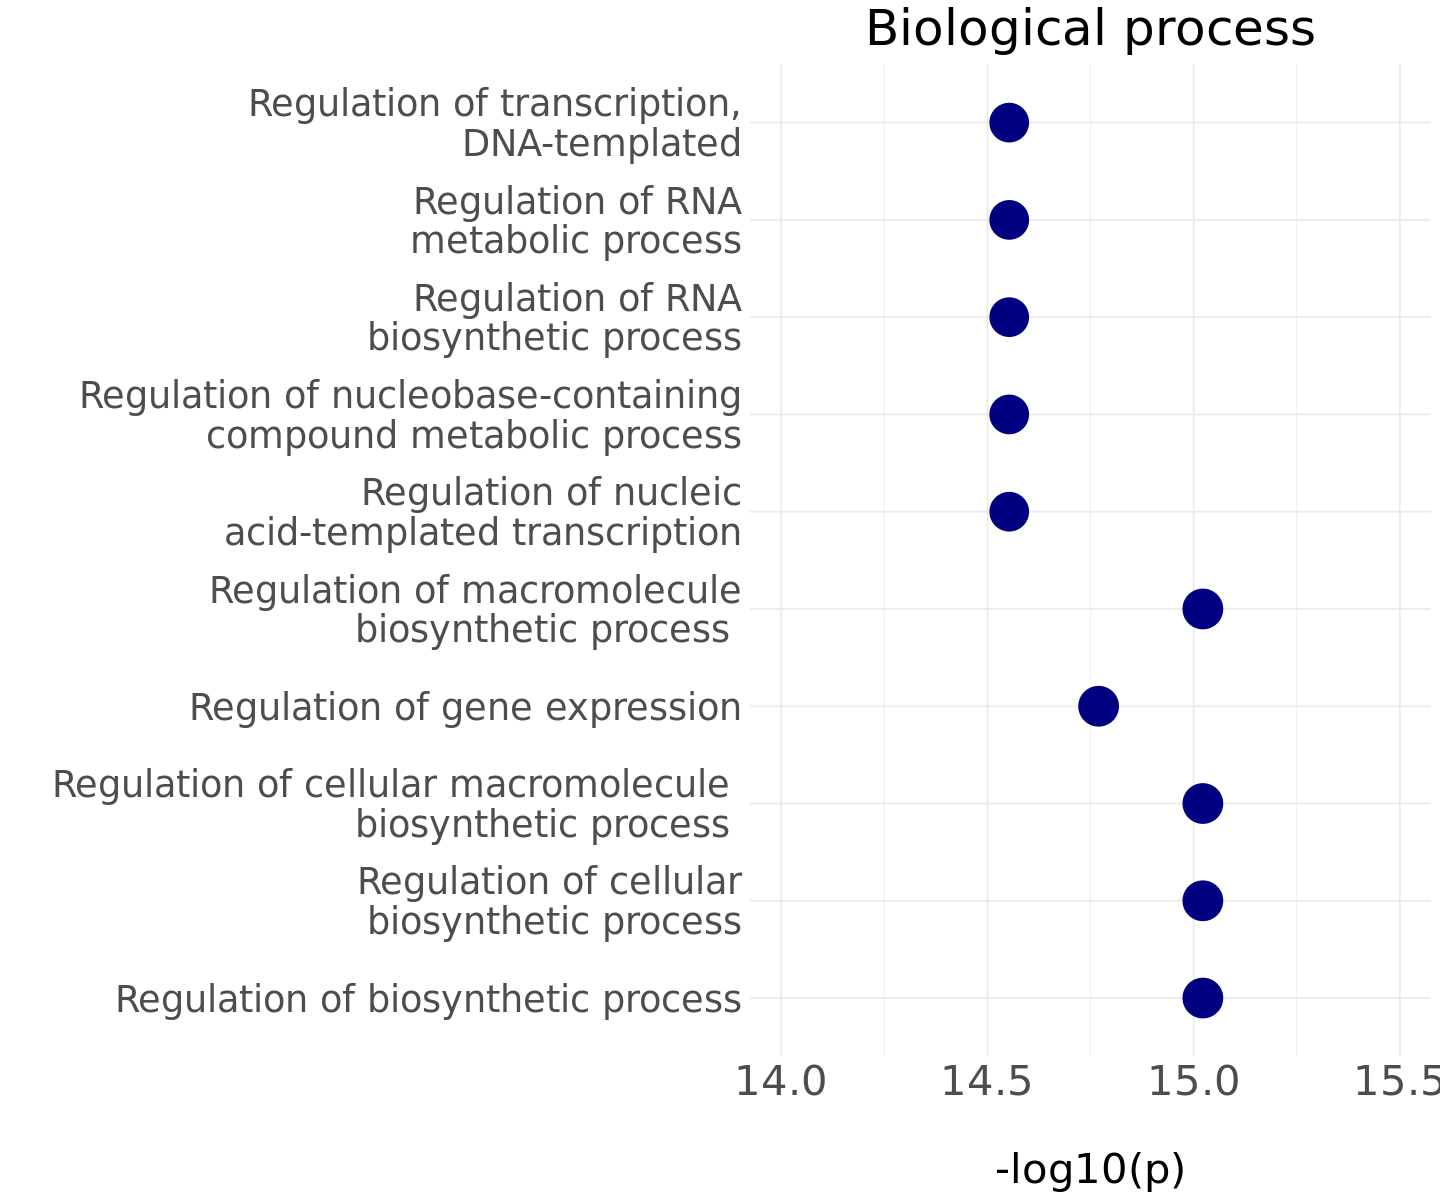

In [41]:
# Libraries
library(ggplot2)
options(repr.plot.width = 12, repr.plot.height = 10)
# Create data
data <- data.frame(
    x=Res_BP$Term, 
    y=y,
    number=number
)

# Horizontal version
p = ggplot(data, aes(x=x, y=y))
p = p + geom_point( color="navyblue", size=number*0.3) + theme_minimal() + coord_flip()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=22), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=30), legend.text=element_text(size=30))
p = p + xlab(" ") + ylab("\n-log10(p)")
p = p + ggtitle("Biological process")+ylim(14,15.5)
#p = p + geom_text(aes(label=c("44"), y=6, x=10), size = 9, col="black")
#p = p + geom_text(aes(label=c("39"), y=6, x=9), size = 9, col="black")
#p = p + geom_text(aes(label=c("41"), y=6, x=8), size = 9, col="black")
#p = p + geom_text(aes(label=c("41"), y=6, x=7), size = 9, col="black")
#p = p + geom_text(aes(label=c("20"), y=8, x=6), size = 9, col="black")
#p = p + geom_text(aes(label=c("22"), y=6, x=1), size = 9, col="black")
#p = p + geom_text(aes(label=c("8"), y=10, x=5), size = 9, col="black")
#p = p + geom_text(aes(label=c("8"), y=10, x=4), size = 9, col="black")
#p = p + geom_text(aes(label=c("8"), y=10, x=3), size = 9, col="black")
#p = p + geom_text(aes(label=c("8"), y=10, x=2), size = 9, col="black")
p

In [1]:
library(readxl)

In [2]:
counts = read_excel("/hydra/enhancer_regions/enhancer_all_counts_aug2021.xlsx")

New names:
* `` -> ...1



In [11]:
colnames(counts)[9] = "Boundcount"

In [17]:
colnames(counts)

[1] "...1"                "Gene ID"             "Name"               
 [4] "Description"         "logFC gene"          "abs(logFC)"         
 [7] "logFC enhancer"      "Counts"              "Boundcount"         
[10] "Motif unbound count"

In [46]:
counts[1:30,]

...1 Gene ID          Name    
1   948 MSTRG.20431      CHRNA4  
2  1353 MSTRG.3144       NOL4L   
3    53 MSTRG.10676      DSCAML1 
4  2170 SMESG000032738.1 -       
5  1791 MSTRG.6954       MSX1    
6  1892 MSTRG.7896       ZNF596  
7  1220 MSTRG.23323      ORC5    
8  1204 MSTRG.23167      RIIAD1  
9   862 MSTRG.1962       PTCH1   
10  167 MSTRG.11967      DAB2IP  
11 1000 MSTRG.21005      TBX20   
12 1191 MSTRG.23026      MEIS2   
13  546 MSTRG.16315      HES2    
14 1005 MSTRG.2103       SLC22A5 
15   62 MSTRG.10715      MAPK3   
16  445 MSTRG.15334      DVL2    
17 1868 MSTRG.7658       HDHD5   
18 1689 MSTRG.586        DBP     
19 1629 MSTRG.5416       C12orf66
20 1021 MSTRG.21189      IRS1    
21 1251 MSTRG.23516      DMRT1   
22  178 MSTRG.11997      PRKAG1  
23   75 MSTRG.10850      ZMIZ2   
24 1017 MSTRG.21183      BTAF1   
25  174 MSTRG.11983      SRGAP2C 
26  657 MSTRG.17691      ZFHX3   
27 1790 MSTRG.6952       MAST1   
28  148 MSTRG.11749      STIL    
29 1574 MSTRG.5093       STON2   
30 1788 MSTRG.6945       CLINT1  
   Description                                                                                        
1  cholinergic receptor nicotinic alpha 4 subunit [Source:HGNC Symbol;Acc:HGNC:1958]                  
2  nucleolar protein 4 like [Source:HGNC Symbol;Acc:HGNC:16106]                                       
3  DS cell adhesion molecule like 1 [Source:HGNC Symbol;Acc:HGNC:14656]                               
4  -                                                                                                  
5  msh homeobox 1 [Source:HGNC Symbol;Acc:HGNC:7391]                                                  
6  zinc finger protein 596 [Source:HGNC Symbol;Acc:HGNC:27268]                                        
7  origin recognition complex subunit 5 [Source:HGNC Symbol;Acc:HGNC:8491]                            
8  regulatory subunit of type II PKA R-subunit domain containing 1 [Source:HGNC Symbol;Acc:HGNC:26686]
9  patched 1 [Source:HGNC Symbol;Acc:HGNC:9585]                                                       
10 DAB2 interacting protein [Source:HGNC Symbol;Acc:HGNC:17294]                                       
11 T-box transcription factor 20 [Source:HGNC Symbol;Acc:HGNC:11598]                                  
12 Meis homeobox 2 [Source:HGNC Symbol;Acc:HGNC:7001]                                                 
13 hes family bHLH transcription factor 2 [Source:HGNC Symbol;Acc:HGNC:16005]                         
14 solute carrier family 22 member 5 [Source:HGNC Symbol;Acc:HGNC:10969]                              
15 mitogen-activated protein kinase 3 [Source:HGNC Symbol;Acc:HGNC:6877]                              
16 dishevelled segment polarity protein 2 [Source:HGNC Symbol;Acc:HGNC:3086]                          
17 haloacid dehalogenase like hydrolase domain containing 5 [Source:HGNC Symbol;Acc:HGNC:1843]        
18 D-box binding PAR bZIP transcription factor [Source:HGNC Symbol;Acc:HGNC:2697]                     
19 chromosome 12 open reading frame 66 [Source:HGNC Symbol;Acc:HGNC:26517]                            
20 insulin receptor substrate 1 [Source:HGNC Symbol;Acc:HGNC:6125]                                    
21 doublesex and mab-3 related transcription factor 1 [Source:HGNC Symbol;Acc:HGNC:2934]              
22 protein kinase AMP-activated non-catalytic subunit gamma 1 [Source:HGNC Symbol;Acc:HGNC:9385]      
23 zinc finger MIZ-type containing 2 [Source:HGNC Symbol;Acc:HGNC:22229]                              
24 B-TFIID TATA-box binding protein associated factor 1 [Source:HGNC Symbol;Acc:HGNC:17307]           
25 SLIT-ROBO Rho GTPase activating protein 2C [Source:HGNC Symbol;Acc:HGNC:30584]                     
26 zinc finger homeobox 3 [Source:HGNC Symbol;Acc:HGNC:777]                                           
27 microtubule associated serine/threonine kinase 1 [Source:HGNC Symbol;Acc:HGNC:19034]               
28 STIL centriolar assembly protein [Source:HGNC Symbol;Acc:HGNC:

In [ ]:
tf_prop = read.csv("/hydra/TF_data/Transcription_factors_01072021_values.csv")
tf_prop = tf_prop[,2:length(tf_prop)]

In [53]:
counts$distrank = 0 
counts$color = "a" 
for (i in 1:nrow(counts)){
    counts$distrank[i] = i
    if (counts$"Gene ID"[i] %in% tf_prop$Neiro){
        counts$color[i] = "b"
    }
}

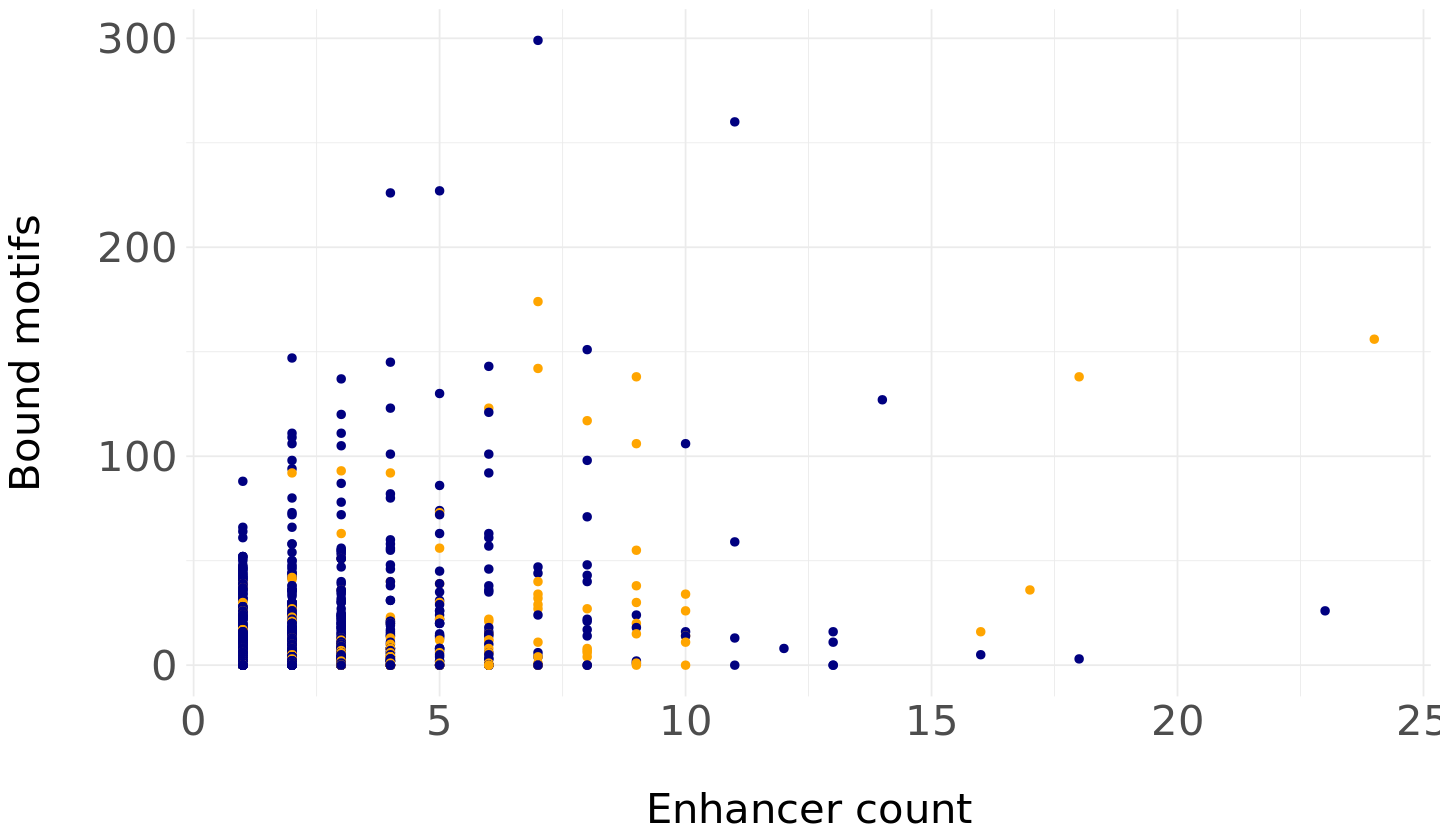

In [56]:
library(ggplot2)
options(repr.plot.width = 12.0, repr.plot.height = 7.0)
p = ggplot(counts, aes(y=Boundcount, x=Counts, color=color))+geom_point(size=2)+theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.position="none", legend.title=element_text(), legend.text=element_text(size=25))
p = p + ylab("Bound motifs\n")+xlab("\nEnhancer count")
p = p + scale_color_manual(name=c("Type"), values=c("navyblue", "orange"))
p

# Assignment of bound footprints to genes

In [3]:
library(ChIPseeker)
library(GenomicFeatures)
library(rtracklayer)

In [4]:
txdb_final = makeTxDbFromGFF("/drives/raid/AboobakerLab/jakke/neiro_bam/stringtie_merged_R.gtf")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
OK



In [10]:
footprints <- readPeakFile("/drives/raid/AboobakerLab/jakke/atac_sexual_final/footprinting/BINDetect_X1/X1_bound_bedfile.bed")
footprints_anno <- annotatePeak(footprints, tssRegion=c(-1000, 1000), TxDb=txdb_final)
footprints_anno = as.data.frame(footprints_anno)
write.csv(footprints_anno, "/drives/raid/AboobakerLab/jakke/atac_sexual_final/footprinting/BINDetect_X1/X1_bound_distance.csv", row.names = FALSE)

>> preparing features information...		 2022-07-07 15:41:06 
>> identifying nearest features...		 2022-07-07 15:41:06 
>> calculating distance from peak to TSS...	 2022-07-07 15:41:07 
>> assigning genomic annotation...		 2022-07-07 15:41:07 
>> assigning chromosome lengths			 2022-07-07 15:41:08 
>> done...					 2022-07-07 15:41:08 


In [28]:
footprints_anno = read.csv("/drives/raid/AboobakerLab/jakke/atac_sexual_final/footprinting/BINDetect_X1/X1_bound_distance_names.csv")

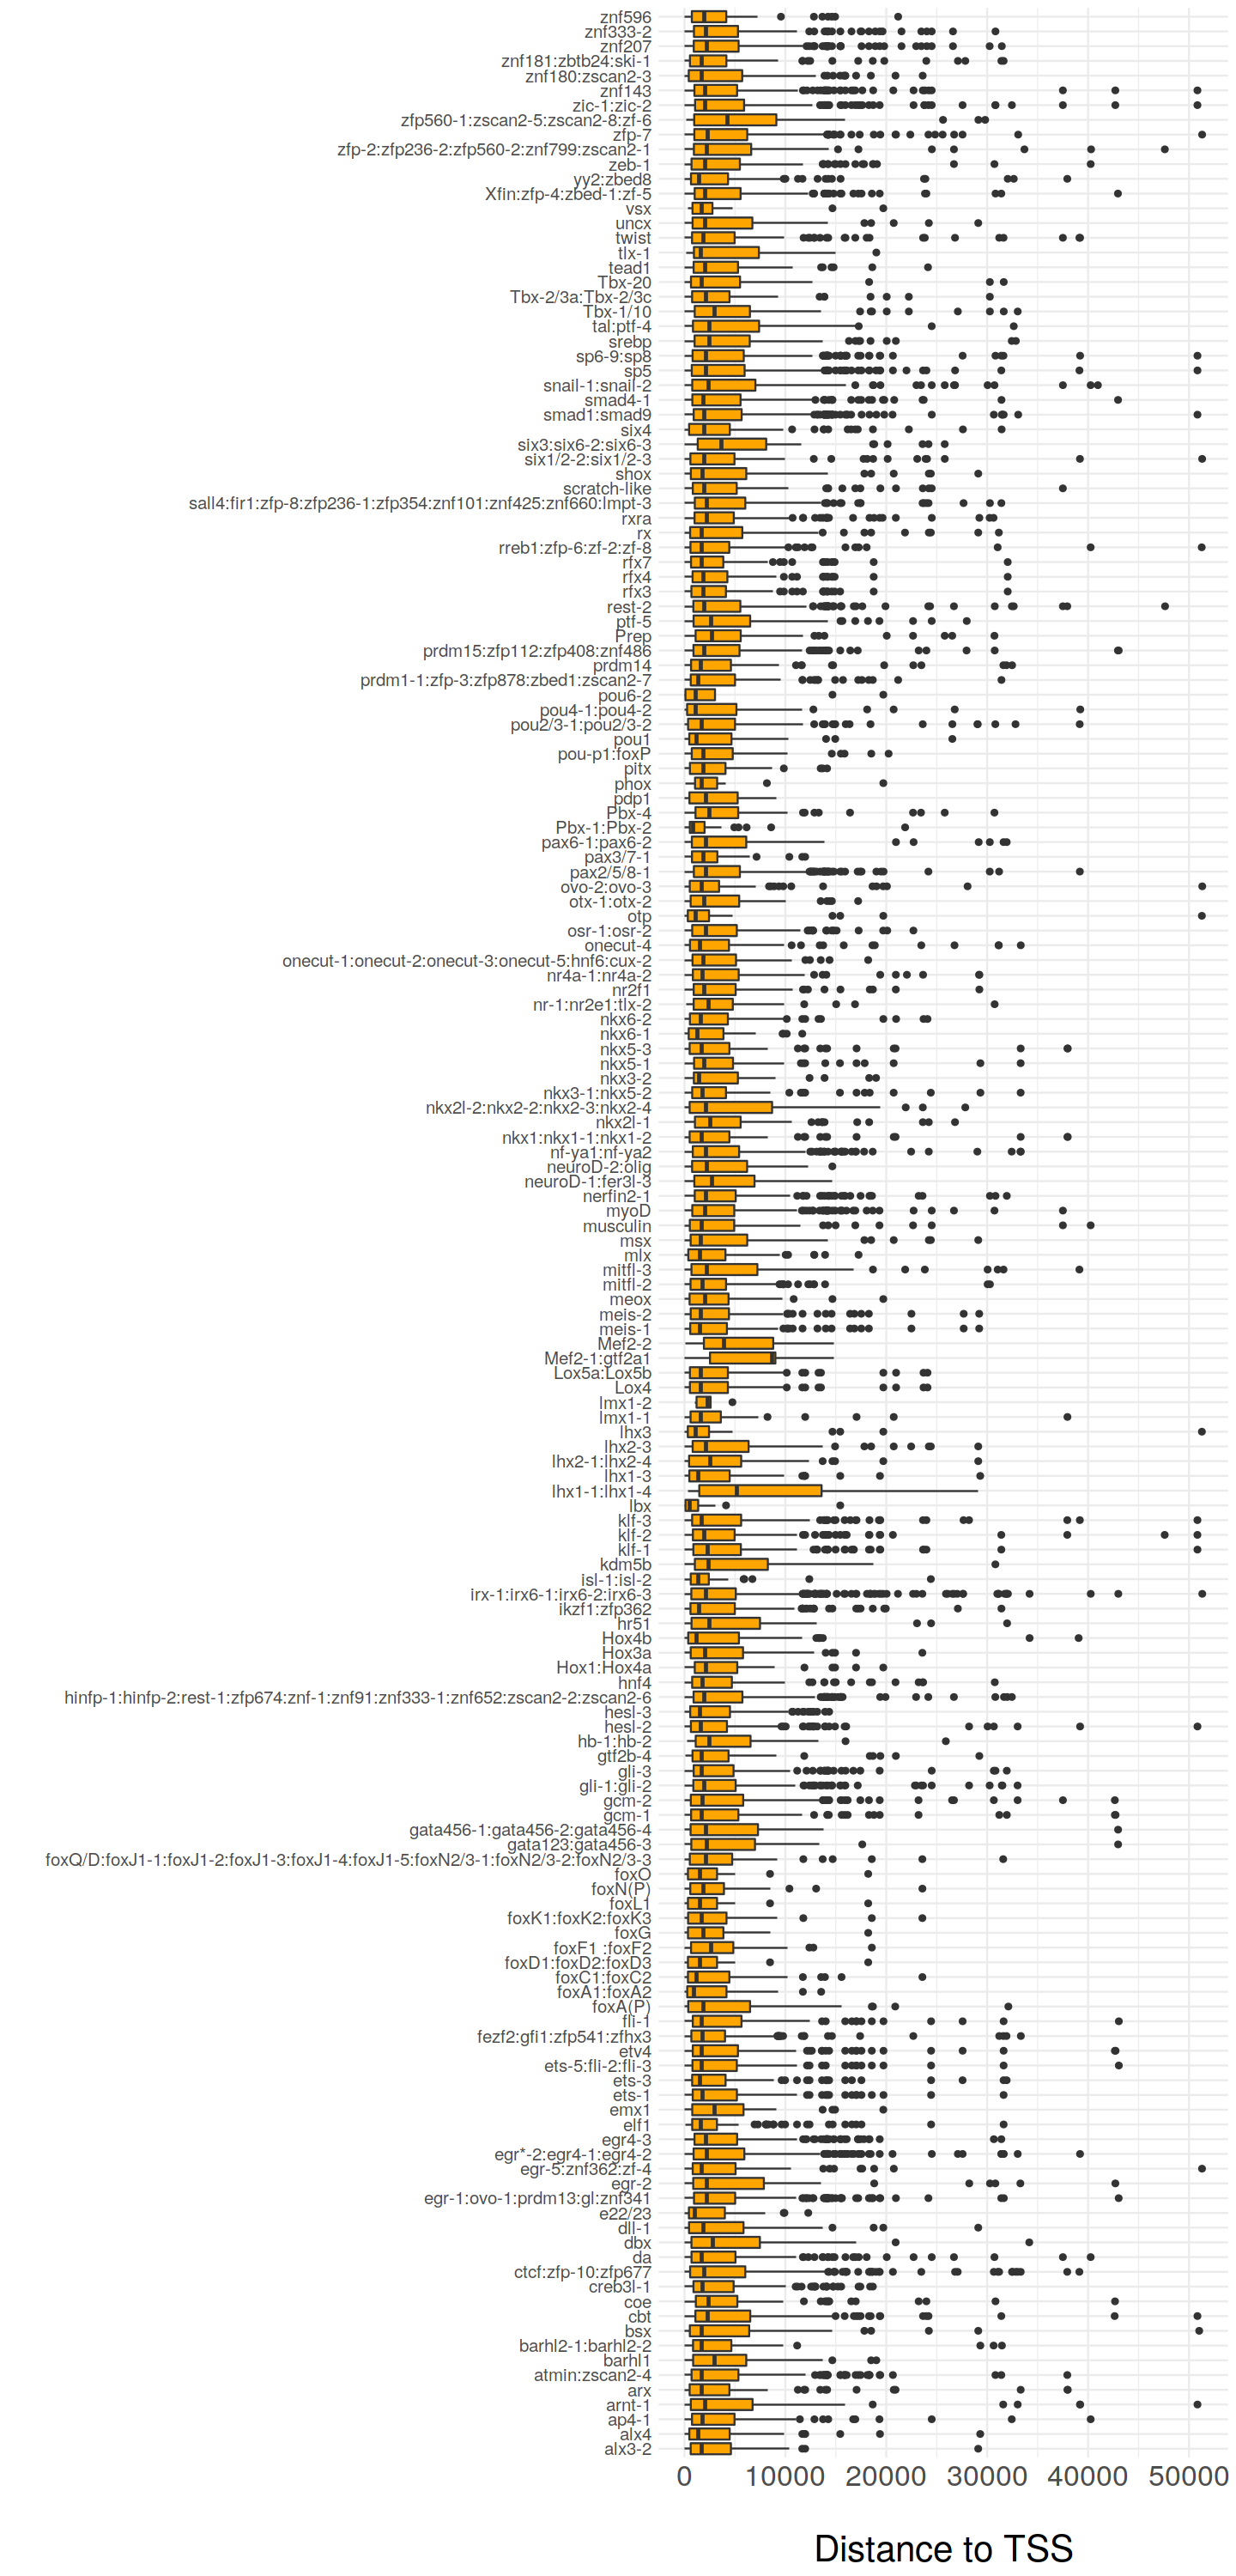

In [57]:
library(ggplot2)
options(repr.plot.width = 12.0, repr.plot.height = 25.0)
p = ggplot(footprints_anno, aes(x=TF.name, y=abs(distanceToTSS)))+geom_boxplot(fill="orange")+coord_flip()
p = p +theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=20), axis.text.x=element_text(size=20), axis.text.y=element_text(size=12), axis.title=element_text(size=25), legend.position="none", legend.title=element_text(), legend.text=element_text(size=20))
p = p + xlab("")+ylab("\nDistance to TSS")
p

Warning message:
“Removed 2568 rows containing non-finite values (stat_boxplot).”


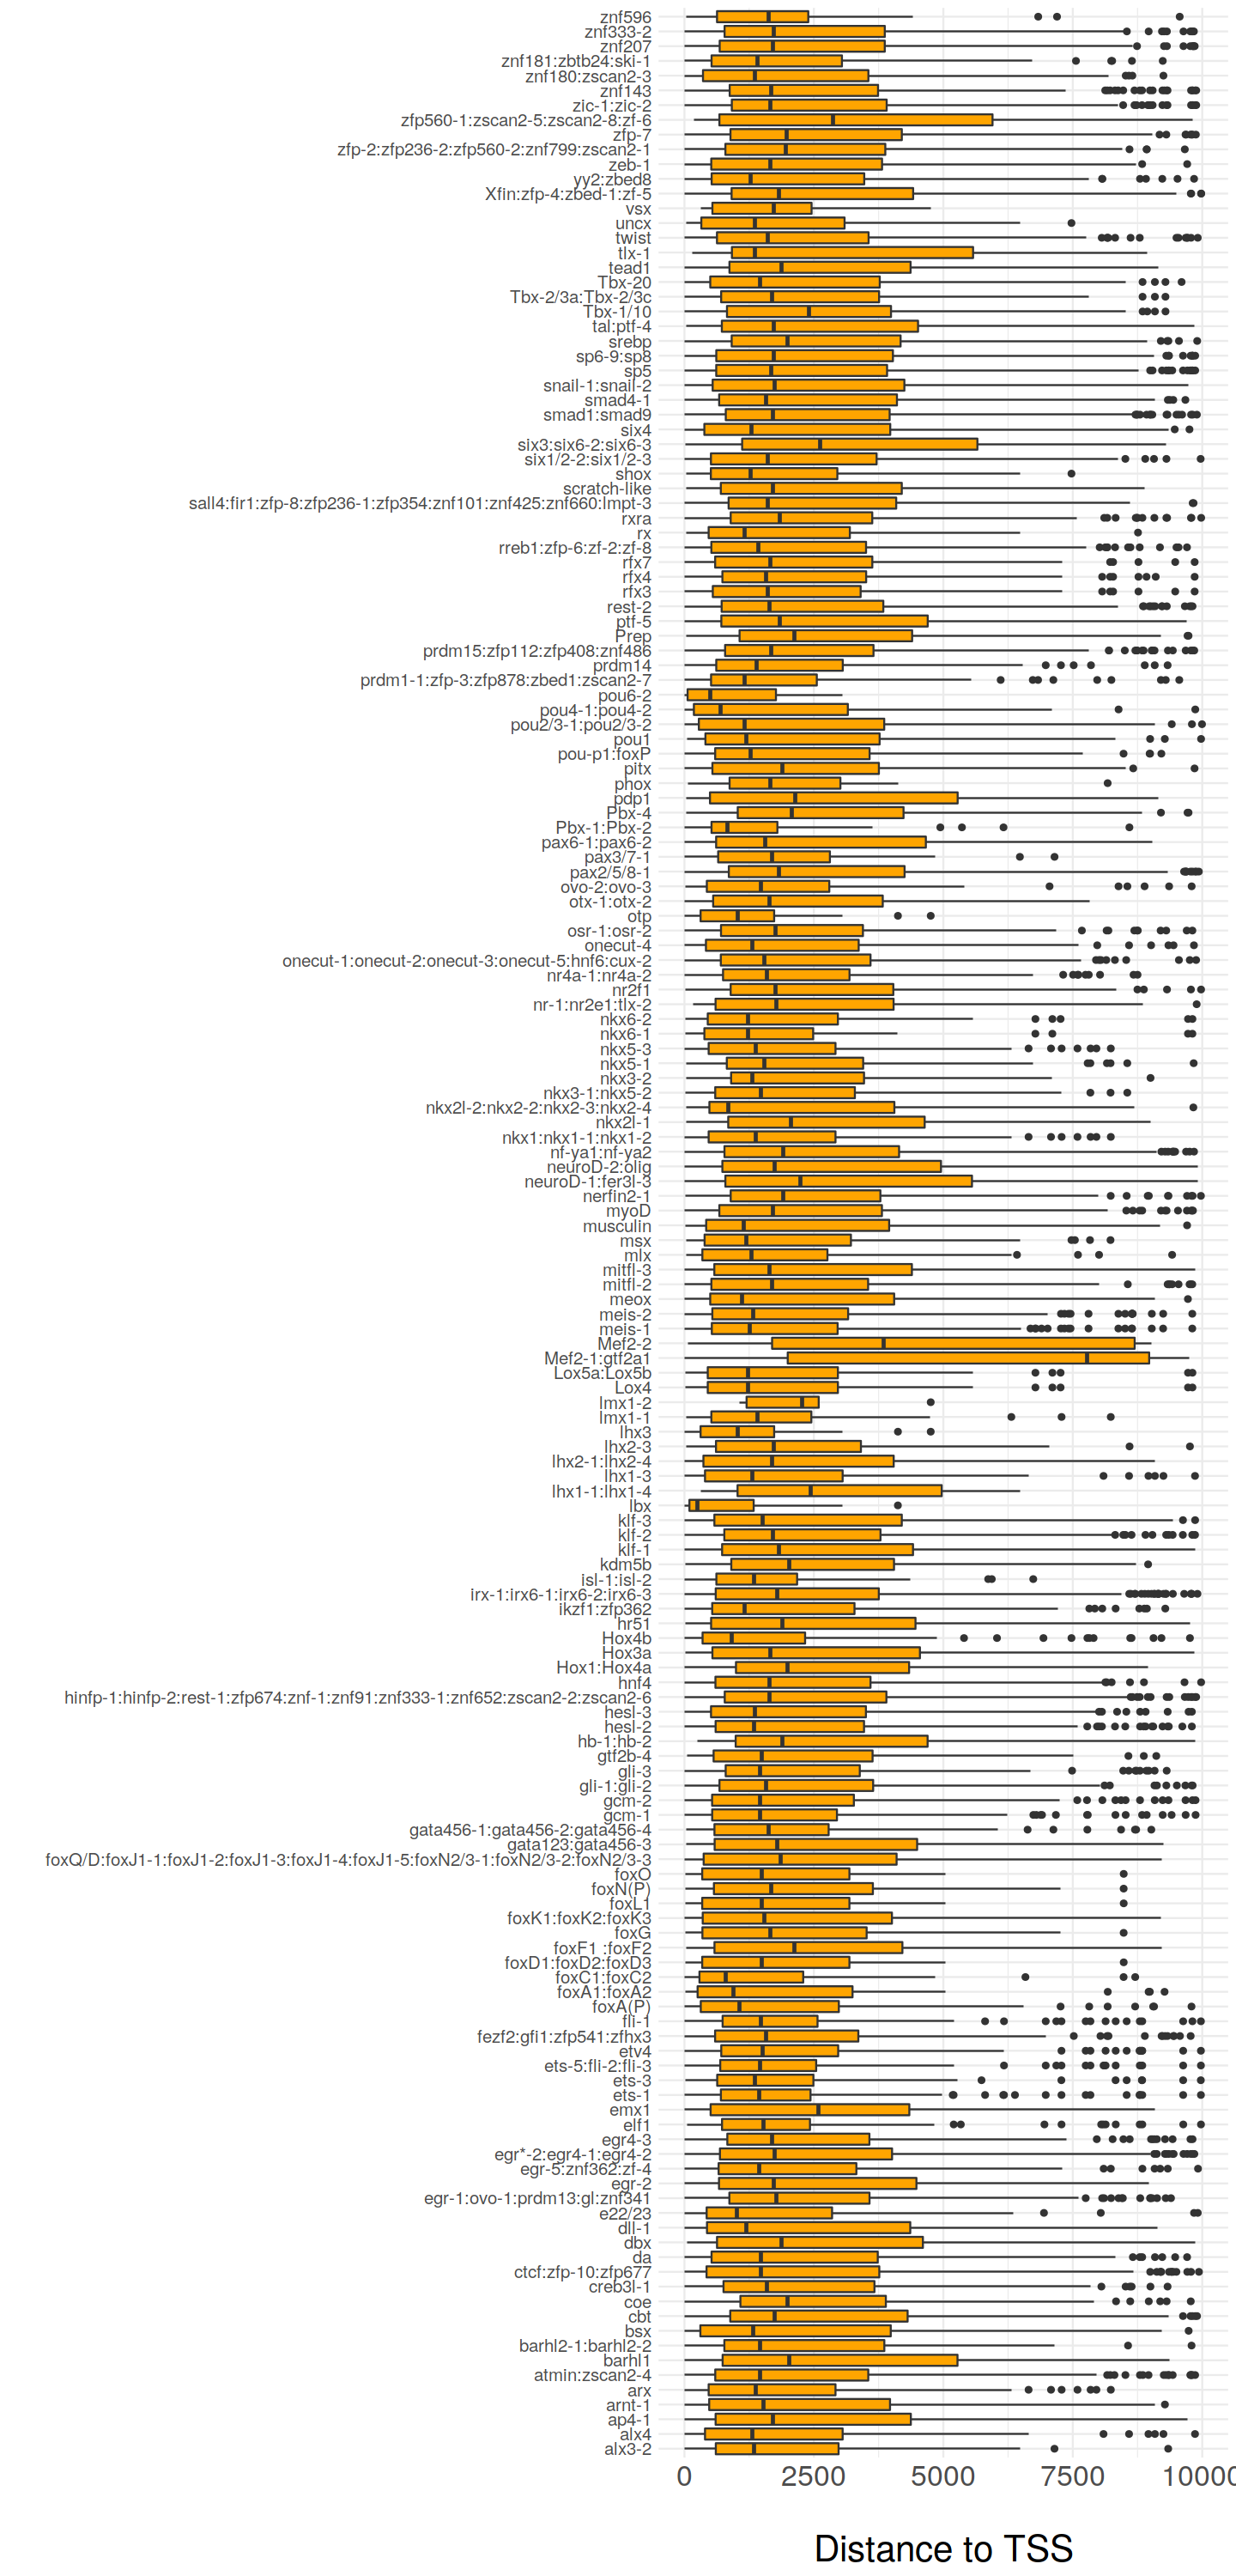

In [58]:
library(ggplot2)
options(repr.plot.width = 12.0, repr.plot.height = 25.0)
p = ggplot(footprints_anno, aes(x=TF.name, y=abs(distanceToTSS)))+geom_boxplot(fill="orange")+coord_flip()
p = p +theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=20), axis.text.x=element_text(size=20), axis.text.y=element_text(size=12), axis.title=element_text(size=25), legend.position="none", legend.title=element_text(), legend.text=element_text(size=20))
p = p + xlab("")+ylab("\nDistance to TSS")+ylim(0,10000)
p

In [86]:
fractions = read.csv("/drives/raid/AboobakerLab/jakke/atac_sexual_final/footprinting/BINDetect_X1/X1_bound_promoterfraction.csv")

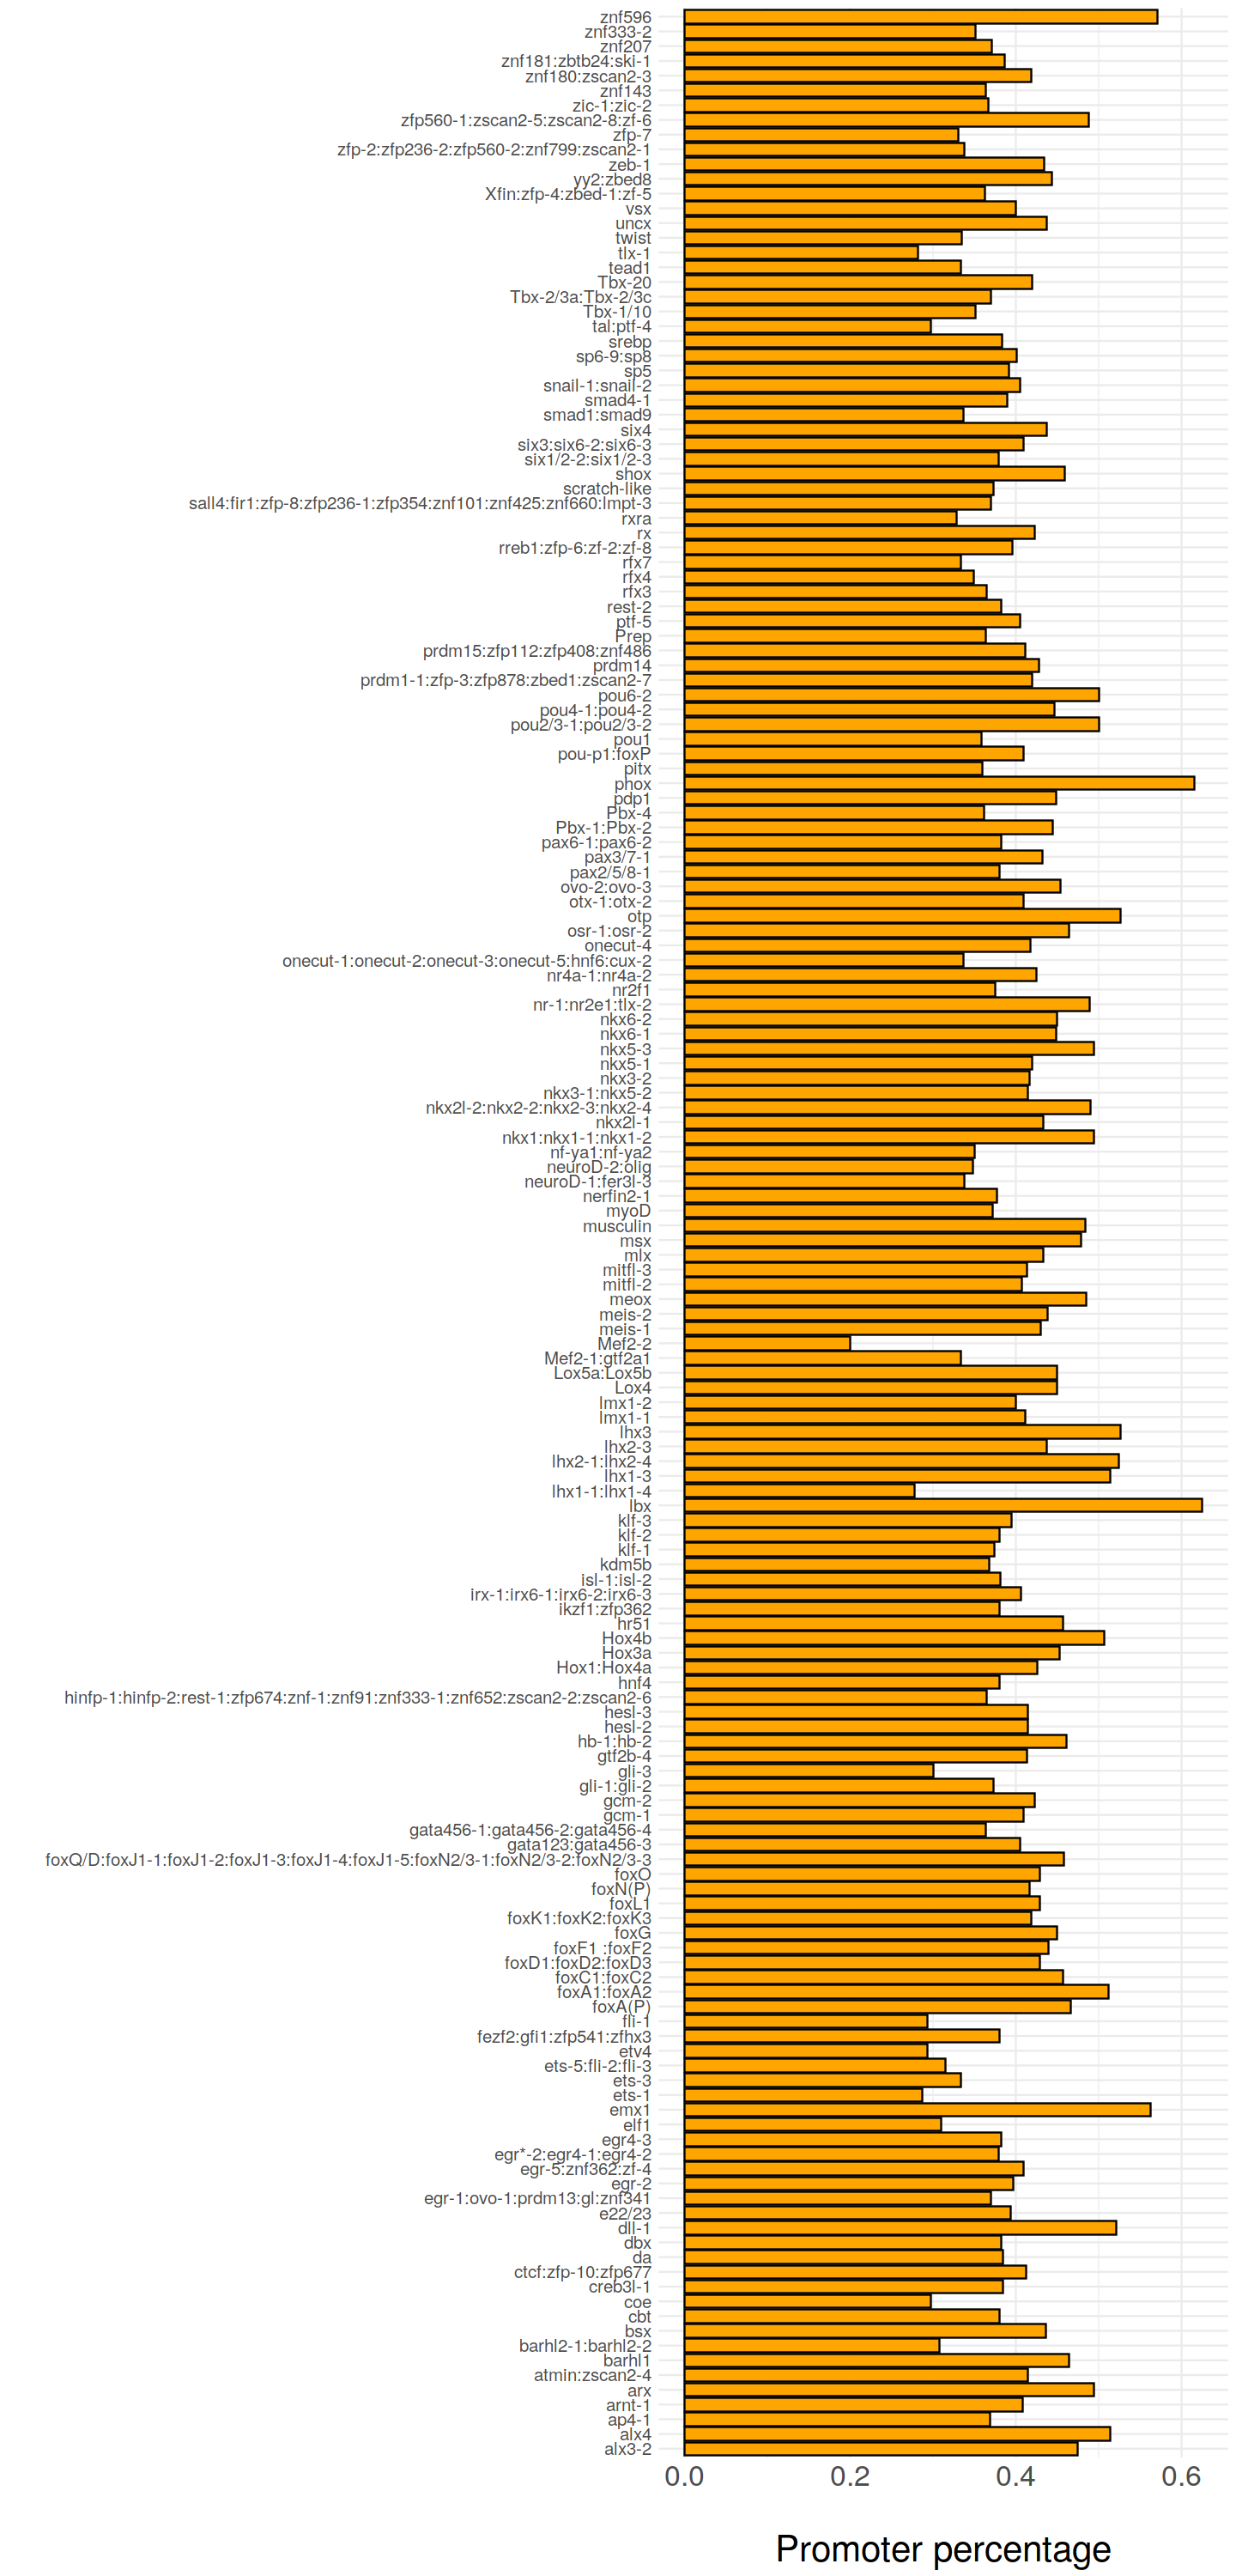

In [87]:
p = ggplot(fractions, aes(x=fraction, y=name))+geom_bar(stat="identity", fill="orange", col="black")
p = p +theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=20), axis.text.x=element_text(size=20), axis.text.y=element_text(size=12), axis.title=element_text(size=25), legend.position="none", legend.title=element_text(), legend.text=element_text(size=20))
p = p + ylab("")+xlab("\nPromoter percentage")
p

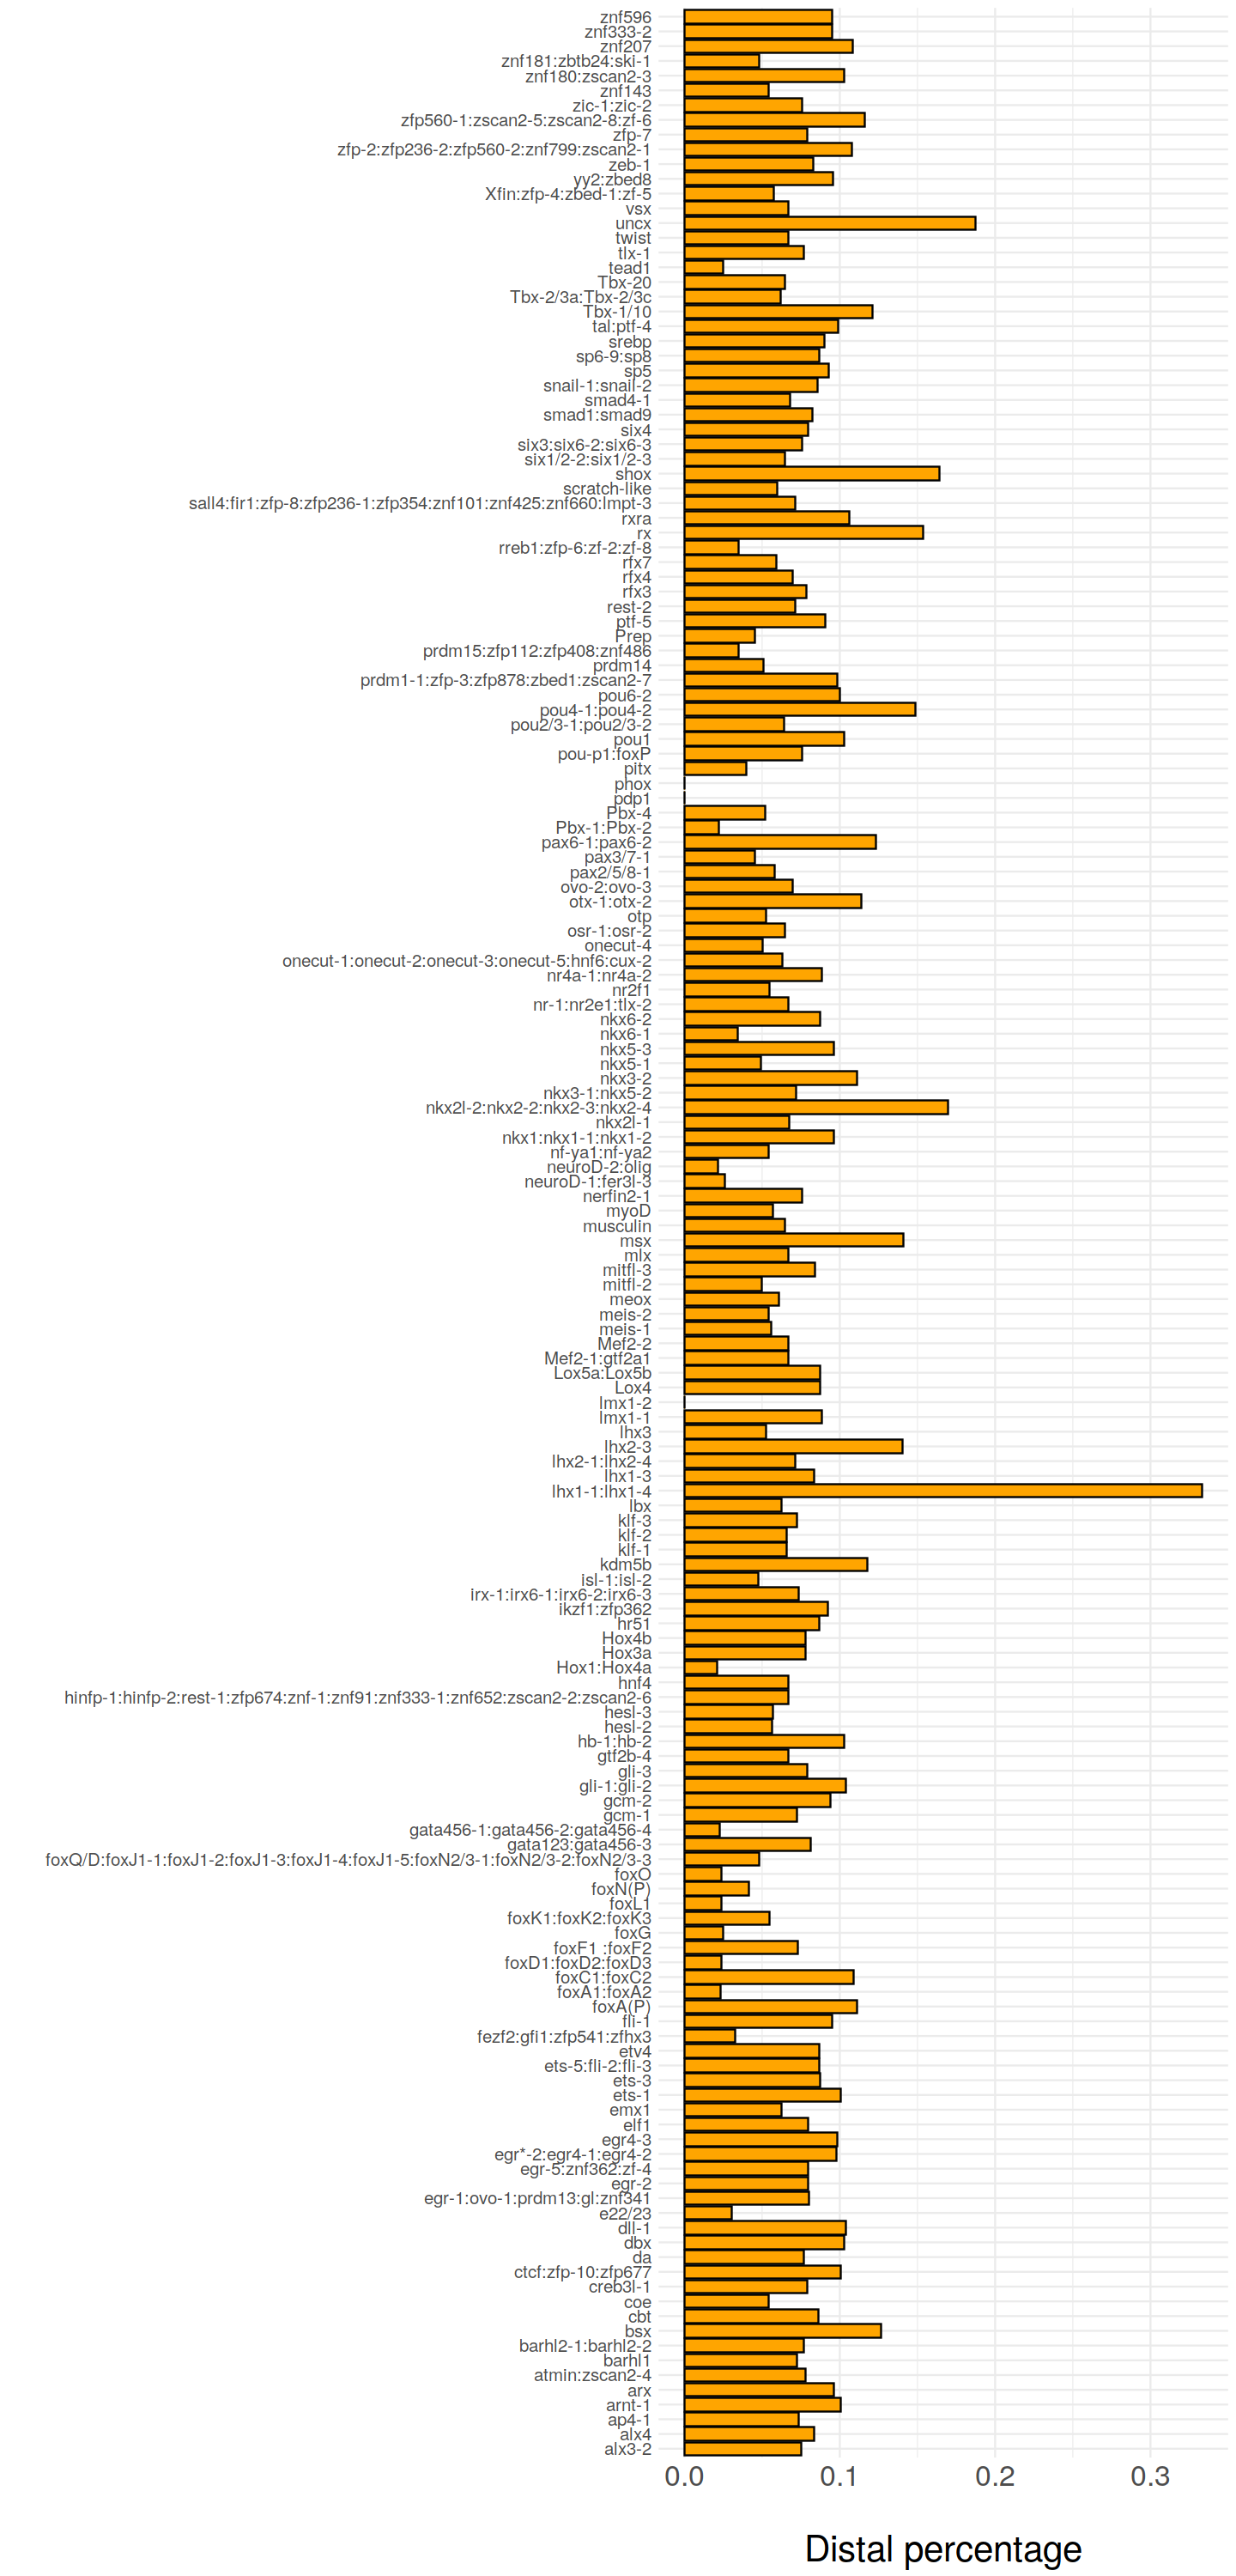

In [89]:
p = ggplot(fractions, aes(x=distal, y=name))+geom_bar(stat="identity", fill="orange", col="black")
p = p +theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=20), axis.text.x=element_text(size=20), axis.text.y=element_text(size=12), axis.title=element_text(size=25), legend.position="none", legend.title=element_text(), legend.text=element_text(size=20))
p = p + ylab("")+xlab("\nDistal percentage")
p